# Análise da Taxa de Evasão de Clientes (Churn Rate)

Autora: Luana Fraga de Andrade Araujo

E-mail: luafraga1@hotmail.com

LinkedIn: www.linkedin.com/in/luana-fraga-63a794193/

Github: https://github.com/luanafraga

# Objetivo do Projeto

O objetivo deste projeto é **Avaliar e reduzir a Taxa de Evasão de Clientes**, conhecido como Churn Rate. Basicamente, o Churn Rate indica o quanto a empresa perdeu de receita ou clientes em um período de tempo.

Como passo inicial, é necessária a **identificação de clientes que teriam uma maior chance de deixar a empresa.** Para isso, é interessante investigar algumas características de clientes para tentar classificar estas pessoas como potenciais candidatas a deixar a empresa ou não.

# Base de dados

A base de dados possui informações sobre:

- **Cliente:**
    - **CustomerID:** número de identificação do cliente
    - **Churn:** se o cliente deixou ou não a empresa
    - **Gender:** gênero (masculino e feminino)
    - **SeniorCitizen:** informação sobre um cliente ter ou não idade igual ou maior que 65 anos
    - **Partner:** se o cliente possui ou não um parceiro ou parceira
    - **Dependents:** se o cliente possui ou não dependentes
    
    
- **Serviço de telefonia:**
    - **Tenure:** meses de contrato do cliente
    - **PhoneService:** assinatura de serviço telefônico
    - **MultipleLines:** assisnatura de mais de uma linha de telefone
    
    
- **Serviço de internet:**
    - **InternetService:** assinatura de um provedor internet
    - **OnlineSecurity:** assinatura adicional de segurança online
    - **OnlineBackup:** assinatura adicional de backup online
    - **DeviceProtection:** assinatura adicional de proteção no dispositivo
    - **TechSupport:** assinatura adicional de suporte técnico, menos tempo de espera
    - **StreamingTV:** assinatura de TV a cabo
    - **StreamingMovies:** assinatura de streaming de filmes
    
    
- **Contrato:**
    - **Contract:** tipo de contrato
    - **PaperlessBilling:** se o cliente prefere receber online a fatura
    - **PaymentMethod:** forma de pagamento
    - **Charges.Monthly:** total de todos os serviços do cliente por mês
    - **Charges.Total:** total gasto pelo cliente

# Importação de Pacotes

In [1]:
import pandas as pd
import numpy as np

# para visualização dos gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.gridspec as gridspec

# para balanceamento do target
from imblearn.over_sampling import SMOTE

In [2]:
# para criação e validação dos modelos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

# para garantir a replicabilidade do código
SEED = 77

In [3]:
pip install -U seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
#definindo paleta e estilo dos gráficos
sns.set_palette('pastel')
sns.set_style("white")

# Leitura dos dados

In [5]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)

In [6]:
url = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'
dados = pd.read_json(url)
dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}","{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}"
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}","{'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 59.9, 'Total': '542.4'}}"
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 4}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'Yes', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No'}","{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 73.9, 'Total': '280.85'}}"
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 13}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'Yes', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'}","{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 98.0, 'Total': '1237.85'}}"
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 3}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}","{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 83.9, 'Total': '267.4'}}"
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 13}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': 'Yes', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'No', 'StreamingMovies': 'No'}","{'Contract': 'One year', 'PaperlessBilling': 'No', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 55.15, 'Total': '742.9'}}"
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 22}","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}","{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 85.1, 'Total': '1873.7'}}"
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 2}","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No'}","{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 50.3, 'Total': '92.75'}}"
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 67}","{'PhoneSe

In [7]:
print(f'Nosso Conjunto de Dados inicial possui {dados.shape[0]} linhas e {dados.shape[1]} colunas.')

Nosso Conjunto de Dados inicial possui 7267 linhas e 6 colunas.


# Normalização do arquivo json para um DataFrame

O arquivo disponibilizado possui dados em formato **JSON**. Para uma melhor visualização do dataframe, precisamos **normalizar** as colunas que contêm dicionários de dados:

In [8]:
dados_customer = pd.json_normalize(data=dados.customer)
dados_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [9]:
dados_phone = pd.json_normalize(data=dados.phone)
dados_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [10]:
dados_internet = pd.json_normalize(data=dados.internet)
dados_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [11]:
dados_account = pd.json_normalize(data=dados.account)
dados_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [12]:
dados_churn = dados[['customerID', 'Churn']]
dados_churn

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes
...,...,...
7262,9987-LUTYD,No
7263,9992-RRAMN,Yes
7264,9992-UJOEL,No
7265,9993-LHIEB,No


# Concatenação dos dados em um único DataFrame

In [13]:
df = pd.concat([dados_churn, dados_customer, dados_phone, dados_internet, dados_account], axis=1)
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [14]:
print(f'Após concatenação dos dados, temos {df.shape[0]} linhas e {df.shape[1]} colunas.')

Após concatenação dos dados, temos 7267 linhas e 21 colunas.


# Renomeação de colunas

In [15]:
df.columns = (['clienteId', 'Evasao', 'Genero', 'Senioridade','Conjuge', 
              'Dependentes', 'MesesContrato', 'ServicoTelefonico', 'ServicoMultiplasLinhas',
              'AssinaturaInternet','SegurancaOnline','BackupOnline', 'ProtecaoDispositivo',
              'SuporteTecnico', 'AssinaturaTvACabo', 'AssinaturaFilmes', 'TipoContrato', 
              'FaturaOnline', 'MetodoPagamento', 'GastoMensal', 'GastoTotal'])
df

,clienteId,Evasao,Genero,Senioridade,Conjuge,Dependentes,MesesContrato,ServicoTelefonico,ServicoMultiplasLinhas,AssinaturaInternet,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,AssinaturaTvACabo,AssinaturaFilmes,TipoContrato,FaturaOnline,MetodoPagamento,GastoMensal,GastoTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


# Informações do DataFrame

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   clienteId               7267 non-null   object 
 1   Evasao                  7267 non-null   object 
 2   Genero                  7267 non-null   object 
 3   Senioridade             7267 non-null   int64  
 4   Conjuge                 7267 non-null   object 
 5   Dependentes             7267 non-null   object 
 6   MesesContrato           7267 non-null   int64  
 7   ServicoTelefonico       7267 non-null   object 
 8   ServicoMultiplasLinhas  7267 non-null   object 
 9   AssinaturaInternet      7267 non-null   object 
 10  SegurancaOnline         7267 non-null   object 
 11  BackupOnline            7267 non-null   object 
 12  ProtecaoDispositivo     7267 non-null   object 
 13  SuporteTecnico          7267 non-null   object 
 14  AssinaturaTvACabo       7267 non-null   

O DataFrame consta com **21 variáveis**. Já verificamos que a variavel GastoTotal está como 'object'. Posteriormente, precisaremos transformar em uma variavel numérica.

In [17]:
df.describe()

,Senioridade,MesesContrato,GastoMensal
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [18]:
df.describe(include=[object])

,clienteId,Evasao,Genero,Conjuge,Dependentes,ServicoTelefonico,ServicoMultiplasLinhas,AssinaturaInternet,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,AssinaturaTvACabo,AssinaturaFilmes,TipoContrato,FaturaOnline,MetodoPagamento,GastoTotal
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,0002-ORFBO,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


Para começar a análise, vamos utilizar o método **.describe()** para entender alguns métodos estatísticos que temos dentro da base de dados. O método describe() fornece as informações sobre:

- Para variáveis **quantitativas**:

   - **count** - Conta a quantidade de número de valores não vazios. Com esses valores podemos entender melhor o tamanho da amostra.

   - **mean** - O valor médio, em média aritmética. 

   - **std** - O desvio padrão. É a medida de como os dados se dispersam em relação à média, ou seja, o quanto eles estão espalhados.

   - **min e max** - Valores que auxiliam a identificar a amplitude da amostra, entre o valor mínimo e máximo.

   - **quartis** - Valores que nos mostram de que forma os dados foram distribuídos, por exemplo em 50% é a mediana e metade dos valores são inferiores a X valor, a outra metade é superior àquele valor.


- Para variáveis **categóricas**:

    - **unique** é a quantidade de valores únicos

    - **top** é o valor mais comum

    - **freq** é a frequência do valor mais comum

# Análise exploratória

Inicialmente vamos explorar o nosso conjunto de dados tentando encontrar **correlações** entre nosso atributo **Evasão** e o restante das variáveis.

Além disso, também pode ser interessante analisar como as outras variáveis específicas se relacionam entre si. Verificaremos também o **tipo dos dados e se há valores nulos**.

## Análise da coluna clienteId

In [19]:
df.clienteId.unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [20]:
df.clienteId.dtypes

dtype('O')

In [21]:
df.clienteId.isna().sum()

0

## Análise da coluna Evasão

In [22]:
df.Evasao.unique()

array(['No', 'Yes', ''], dtype=object)

In [23]:
df.query('Evasao == ""')

,clienteId,Evasao,Genero,Senioridade,Conjuge,Dependentes,MesesContrato,ServicoTelefonico,ServicoMultiplasLinhas,AssinaturaInternet,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,AssinaturaTvACabo,AssinaturaFilmes,TipoContrato,FaturaOnline,MetodoPagamento,GastoMensal,GastoTotal
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


Foram verificados **224 dados vazios** na coluna 'Evasao'. Esses dados serão **eliminados**, visto que representa somente **3%** do total e é a informação mais relevante do nosso estudo, podendo causar distorções no resultado final.

In [24]:
sem_dados = df['Evasao'] != ""
df = df[sem_dados]
df

,clienteId,Evasao,Genero,Senioridade,Conjuge,Dependentes,MesesContrato,ServicoTelefonico,ServicoMultiplasLinhas,AssinaturaInternet,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,AssinaturaTvACabo,AssinaturaFilmes,TipoContrato,FaturaOnline,MetodoPagamento,GastoMensal,GastoTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [25]:
print(f'Depois da retirada dos dados vazios, nosso DataFrame consta com {df.shape[0]} linhas e {df.shape[1]} colunas.')

Depois da retirada dos dados vazios, nosso DataFrame consta com 7043 linhas e 21 colunas.


In [26]:
sim_nao = {'Yes':'Sim', 'No': 'Nao'}

In [27]:
df.Evasao = df.Evasao.map(sim_nao)
df.Evasao

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0       Nao
1       Nao
2       Sim
3       Sim
4       Sim
       ... 
7262    Nao
7263    Sim
7264    Nao
7265    Nao
7266    Nao
Name: Evasao, Length: 7043, dtype: object

In [28]:
df.value_counts(subset='Evasao', normalize=True)

Evasao
Nao    0.73463
Sim    0.26537
dtype: float64

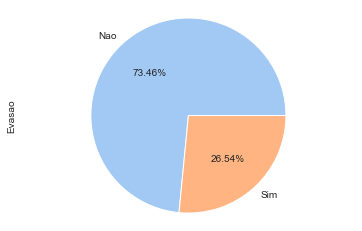

In [29]:
df['Evasao'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Boxplot Evasão X Gastos Mensais')

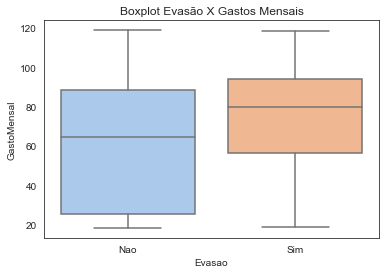

In [30]:
sns.boxplot(x='Evasao', y='GastoMensal', data=df)
plt.title('Boxplot Evasão X Gastos Mensais')

In [31]:
def histograma(df, x_col, xlabel, titulo):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(data=df.query('Evasao=="Nao"'), x=x_col, ax=axes[0])
    axes[0].set_title('Distribuição dos clientes sem Churn', fontsize=14, style='italic')
    axes[0].set_xlabel(xlabel, fontsize=12)
    axes[0].set_ylabel('Nº de clientes', fontsize=12)

    sns.histplot(data=df.query('Evasao=="Sim"'), x=x_col, ax=axes[1], color='lightsalmon')
    axes[1].set_title('Distribuição dos clientes com Churn', fontsize=14, style='italic')
    axes[1].set_xlabel(xlabel, fontsize=12)
    axes[1].set_ylabel('Nº de clientes', fontsize=12)
    fig.suptitle(f'Distribuição {titulo}', fontsize=18, weight='bold', color='#164980')
    plt.show()

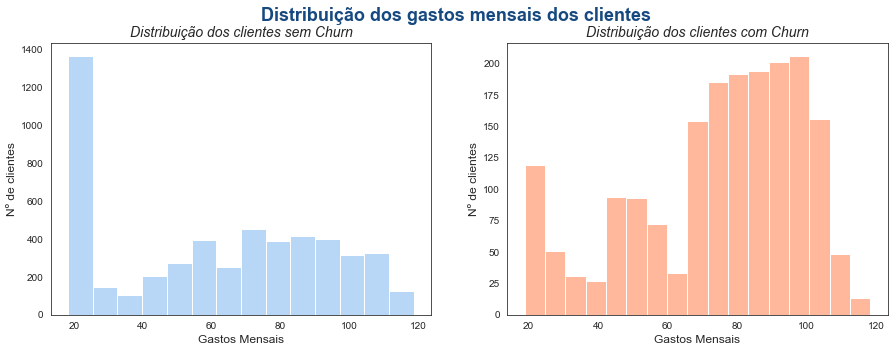

In [32]:
histograma(df, x_col='GastoMensal', xlabel = 'Gastos Mensais', titulo = 'dos gastos mensais dos clientes')

Taxa de **evasão** de clientes: **26,54%**. Pode-se considerar uma taxa de churn bastante **alta**, por isso nossa análise será importante para identificar as possíveis causas. Precisamos criar campanhas para **identificar o perfil dos clientes** que estamos perdendo em busca de fidelizá-los. 

Verificamos também que a maior parte dos clientes que **não renovaram o contrato, são os que gastam mais com a plataforma**. Isto levanta a hipótese de que talvez nossos clientes que evadiram possam ter contratado planos mais caros que não atenderam suas expectativas. Talvez seja uma alternativa ofertar planos com melhor relação custo benefício?

## Análise da coluna Gênero

In [33]:
fem_masc = {'Female':'feminino', 'Male':'masculino'}
df.Genero = df.Genero.map(fem_masc)
df.Genero

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0        feminino
1       masculino
2       masculino
3       masculino
4        feminino
          ...    
7262     feminino
7263    masculino
7264    masculino
7265    masculino
7266    masculino
Name: Genero, Length: 7043, dtype: object

In [34]:
df.Genero.unique()

array(['feminino', 'masculino'], dtype=object)

In [35]:
df.value_counts(subset='Genero', normalize=True)

Genero
masculino    0.504756
feminino     0.495244
dtype: float64

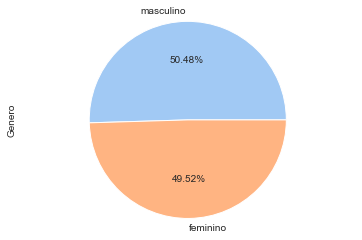

In [36]:
df['Genero'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

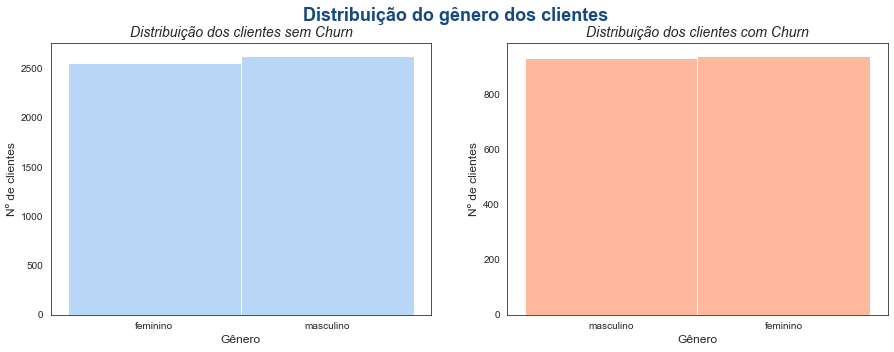

In [37]:
histograma(df, x_col='Genero', xlabel = 'Gênero', titulo = 'do gênero dos clientes')

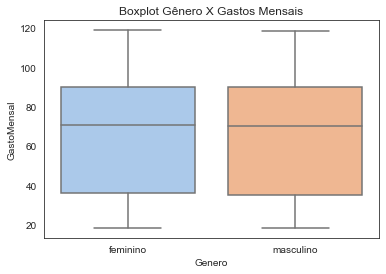

In [38]:
sns.boxplot(x='Genero', y='GastoMensal', data=df)
plt.title('Boxplot Gênero X Gastos Mensais')
plt.show()

**Verificamos que os gêneros feminino e masculino estão bem divididos em quantidade, em valor total de gastos e em taxa de churn.**

## Análise da coluna Senioridade

In [39]:
df.Senioridade.unique()

array([0, 1])

In [40]:
senior = {0:'Nao', 1:'Sim'}
df.Senioridade = df.Senioridade.map(senior)
df.Senioridade

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0       Nao
1       Nao
2       Nao
3       Sim
4       Sim
       ... 
7262    Nao
7263    Nao
7264    Nao
7265    Nao
7266    Nao
Name: Senioridade, Length: 7043, dtype: object

In [41]:
df.value_counts(subset='Senioridade', normalize=True)

Senioridade
Nao    0.837853
Sim    0.162147
dtype: float64

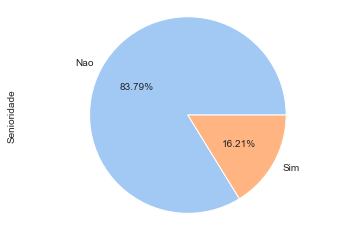

In [42]:
df['Senioridade'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()
#Senioridade > 65 anos

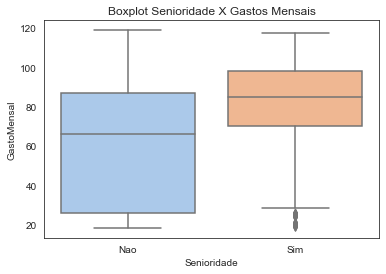

In [43]:
sns.boxplot(x='Senioridade', y='GastoMensal', data=df)
plt.title('Boxplot Senioridade X Gastos Mensais')
plt.show()

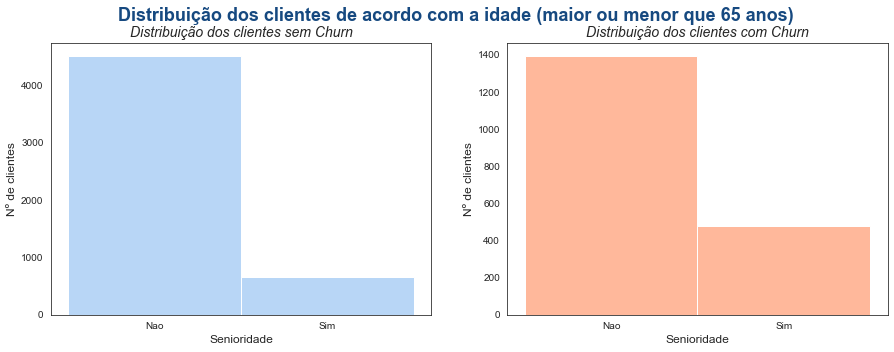

In [44]:
histograma(df, x_col='Senioridade', xlabel = 'Senioridade', titulo = 'dos clientes de acordo com a idade (maior ou menor que 65 anos)')

**83,79% dos clientes se encontram na faixa etária abaixo de 65 anos.**
Verificamos que há uma **maior concentração de gastos em clientes nesta faixa etária** (o primeiro quartil desta faixa etária é a mediana dos clientes que se encontram abaixo de 65 anos).

Apesar da quantidade de clientes idosos ser menor, a **proporção de clientes que cancelaram o serviço entre os idosos é maior que a de clientes que não são idosos**. Entender os motivos que estão levando a essa taxa de cancelamento entre os idosos e adotar medidas para melhorar o serviço para esses clientes é uma boa opção para reduzir o churn.

## Análise da coluna Cônjuge

In [45]:
df.Conjuge.unique()

array(['Yes', 'No'], dtype=object)

In [46]:
df.Conjuge = df.Conjuge.map(sim_nao)
df.Conjuge

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0       Sim
1       Nao
2       Nao
3       Sim
4       Sim
       ... 
7262    Nao
7263    Sim
7264    Nao
7265    Sim
7266    Sim
Name: Conjuge, Length: 7043, dtype: object

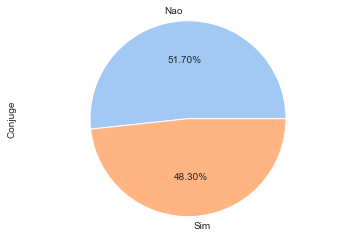

In [47]:
df['Conjuge'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

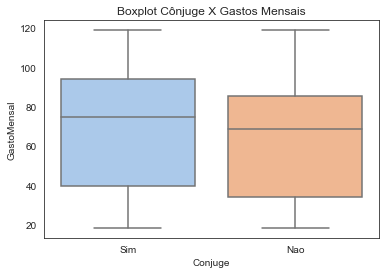

In [48]:
sns.boxplot(x='Conjuge', y='GastoMensal', data=df)
plt.title('Boxplot Cônjuge X Gastos Mensais')
plt.show()

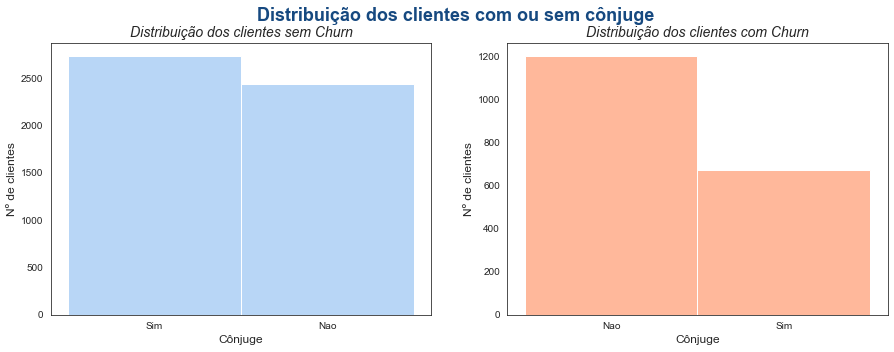

In [49]:
histograma(df, x_col='Conjuge', xlabel = 'Cônjuge', titulo = 'dos clientes com ou sem cônjuge')

Não há grande diferença na proporção de pessoas com cônjuge ou sem. Os clientes **sem cônjuge são os que possuem maior taxa de evasão.**

## Análise da coluna Dependentes

In [50]:
df.Dependentes.unique()

array(['Yes', 'No'], dtype=object)

In [51]:
df.Dependentes = df.Dependentes.map(sim_nao)
df.Dependentes

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0       Sim
1       Nao
2       Nao
3       Nao
4       Nao
       ... 
7262    Nao
7263    Nao
7264    Nao
7265    Sim
7266    Sim
Name: Dependentes, Length: 7043, dtype: object

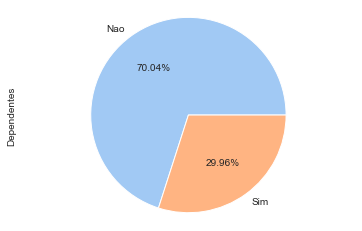

In [52]:
df['Dependentes'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

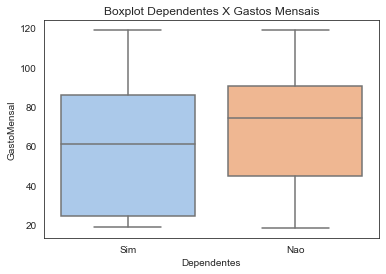

In [53]:
sns.boxplot(x='Dependentes', y='GastoMensal', data=df)
plt.title('Boxplot Dependentes X Gastos Mensais')
plt.show()

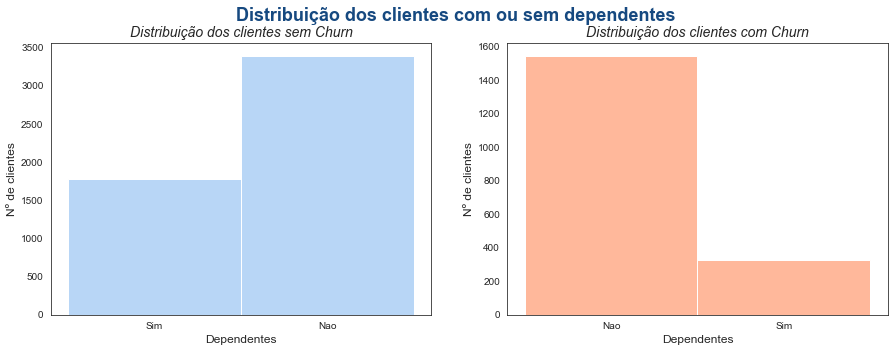

In [54]:
histograma(df, x_col='Dependentes', xlabel = 'Dependentes', titulo = 'dos clientes com ou sem dependentes')

**70% dos clientes não tem dependentes - 70%, e estes são os que possuem uma maior taxa de evasão.**

## Análise da coluna MesesContrato

In [55]:
df.MesesContrato.unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42,  0])

In [56]:
df.MesesContrato.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: MesesContrato, dtype: float64

In [57]:
#Faixa meses
#0-10 = 1
#11-20 = 2
#21-30 = 3
#31-40 = 4
#41-50 = 5
#51-60 = 6
#61-72 = 7
lista = ['0-10 meses', '11-20 meses', '21-30 meses', '31-40 meses', 
         '41-50 meses', '51-60 meses', '61-72 meses']

In [58]:
df['faixa_meses'] = pd.cut(x=df['MesesContrato'], bins=[0,11,21,31,41,51,61,72], labels=[1,2,3,4,5,6,7])
df['faixa_meses']

/var/folders/wq/v6b_q61j6zqc33gpbvj9jb000000gn/T/ipykernel_62682/4199356700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['faixa_meses'] = pd.cut(x=df['MesesContrato'], bins=[0,11,21,31,41,51,61,72], labels=[1,2,3,4,5,6,7])


0       1
1       1
2       1
3       2
4       1
       ..
7262    2
7263    3
7264    1
7265    7
7266    7
Name: faixa_meses, Length: 7043, dtype: category
Categories (7, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7]

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   clienteId               7043 non-null   object  
 1   Evasao                  7043 non-null   object  
 2   Genero                  7043 non-null   object  
 3   Senioridade             7043 non-null   object  
 4   Conjuge                 7043 non-null   object  
 5   Dependentes             7043 non-null   object  
 6   MesesContrato           7043 non-null   int64   
 7   ServicoTelefonico       7043 non-null   object  
 8   ServicoMultiplasLinhas  7043 non-null   object  
 9   AssinaturaInternet      7043 non-null   object  
 10  SegurancaOnline         7043 non-null   object  
 11  BackupOnline            7043 non-null   object  
 12  ProtecaoDispositivo     7043 non-null   object  
 13  SuporteTecnico          7043 non-null   object  
 14  AssinaturaTvACabo       

In [60]:
df['faixa_meses'] = pd.to_numeric(df['faixa_meses'],errors = 'coerce')

/var/folders/wq/v6b_q61j6zqc33gpbvj9jb000000gn/T/ipykernel_62682/2383439782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['faixa_meses'] = pd.to_numeric(df['faixa_meses'],errors = 'coerce')


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   clienteId               7043 non-null   object 
 1   Evasao                  7043 non-null   object 
 2   Genero                  7043 non-null   object 
 3   Senioridade             7043 non-null   object 
 4   Conjuge                 7043 non-null   object 
 5   Dependentes             7043 non-null   object 
 6   MesesContrato           7043 non-null   int64  
 7   ServicoTelefonico       7043 non-null   object 
 8   ServicoMultiplasLinhas  7043 non-null   object 
 9   AssinaturaInternet      7043 non-null   object 
 10  SegurancaOnline         7043 non-null   object 
 11  BackupOnline            7043 non-null   object 
 12  ProtecaoDispositivo     7043 non-null   object 
 13  SuporteTecnico          7043 non-null   object 
 14  AssinaturaTvACabo       7043 non-null   

In [62]:
df['faixa_meses'].isna().sum()

11

In [63]:
df[df['faixa_meses'].isna()]

,clienteId,Evasao,Genero,Senioridade,Conjuge,Dependentes,MesesContrato,ServicoTelefonico,ServicoMultiplasLinhas,AssinaturaInternet,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,AssinaturaTvACabo,AssinaturaFilmes,TipoContrato,FaturaOnline,MetodoPagamento,GastoMensal,GastoTotal,faixa_meses
975,1371-DWPAZ,Nao,feminino,Nao,Sim,Sim,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,NaN
1775,2520-SGTTA,Nao,feminino,Nao,Sim,Sim,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,NaN
1955,2775-SEFEE,Nao,masculino,Nao,Nao,Sim,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,NaN
2075,2923-ARZLG,Nao,masculino,Nao,Sim,Sim,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,NaN
2232,3115-CZMZD,Nao,masculino,Nao,Nao,Sim,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,NaN
2308,3213-VVOLG,Nao,masculino,Nao,Sim,Sim,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,NaN
2930,4075-WKNIU,Nao,feminino,Nao,Sim,Sim,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,NaN
3134,4367-NUYAO,Nao,masculino,Nao,Sim,Sim,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,NaN
3203,4472-LVYGI,Nao,feminino,Nao,Sim,Sim,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,NaN
4169,5709-LVOEQ,Nao,feminino,Nao,Sim,Sim,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,NaN


In [64]:
df['faixa_meses'].fillna(1, inplace=True)

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


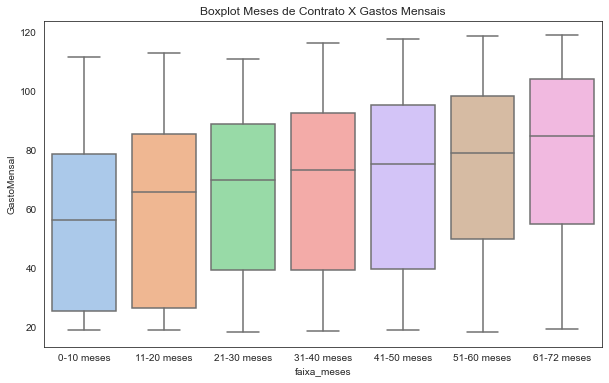

In [65]:
fig = plt.figure(figsize=(10,6))
ax = sns.boxplot(x='faixa_meses', y='GastoMensal', data=df)
ax.set_xticklabels(lista)
plt.title('Boxplot Meses de Contrato X Gastos Mensais')
plt.show()

In [66]:
df.MesesContrato.value_counts(ascending=False)

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: MesesContrato, Length: 73, dtype: int64

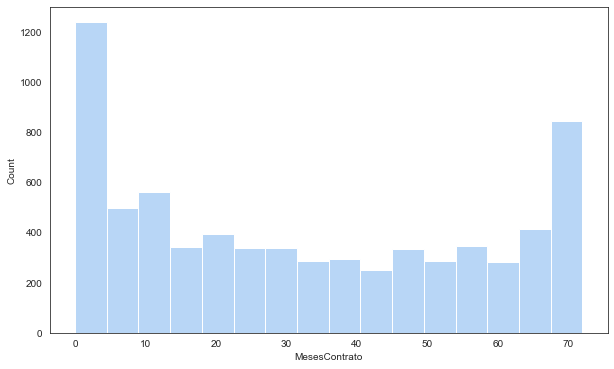

In [67]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['MesesContrato'], kde=False)
plt.show()

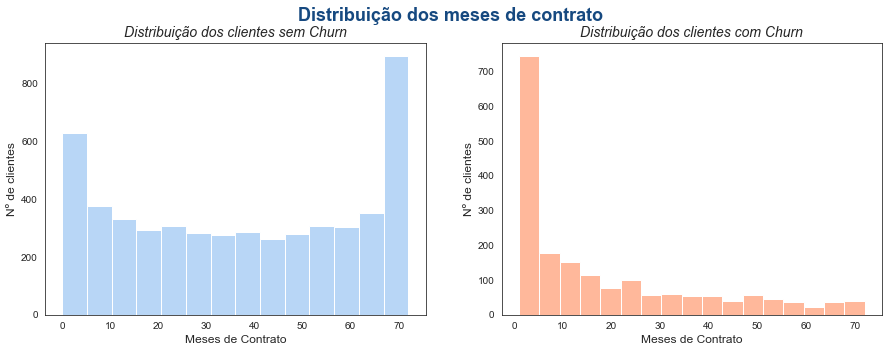

In [68]:
histograma(df, x_col='MesesContrato', xlabel = 'Meses de Contrato', titulo = 'dos meses de contrato')

Podemos notar que uma grande quantidade de clientes está nos extremos do tempo de contrato (**abaixo de 10 meses e acima de 70 meses**). Analisando os clientes evadidos, a maioria **abandonam a empresa antes de completarem 1 ano de contrato**. Campanhas com **preços promocionais e degustação de serviços** talvez possam ser estratégias para estimular a permanência de nossos clientes na empresa.

## Análise da coluna ServiçoTelefonico

In [69]:
df.ServicoTelefonico.unique()

array(['Yes', 'No'], dtype=object)

In [70]:
df.ServicoTelefonico = df.ServicoTelefonico.map(sim_nao)
df.ServicoTelefonico

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0       Sim
1       Sim
2       Sim
3       Sim
4       Sim
       ... 
7262    Sim
7263    Sim
7264    Sim
7265    Sim
7266    Nao
Name: ServicoTelefonico, Length: 7043, dtype: object

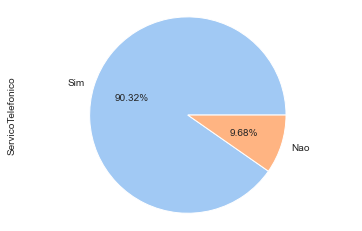

In [71]:
df['ServicoTelefonico'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

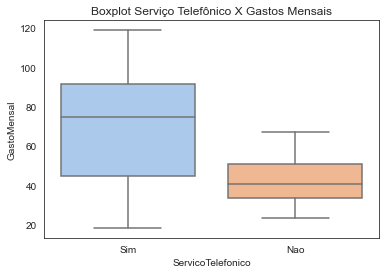

In [72]:
sns.boxplot(x='ServicoTelefonico', y='GastoMensal', data=df)
plt.title('Boxplot Serviço Telefônico X Gastos Mensais')
plt.show()

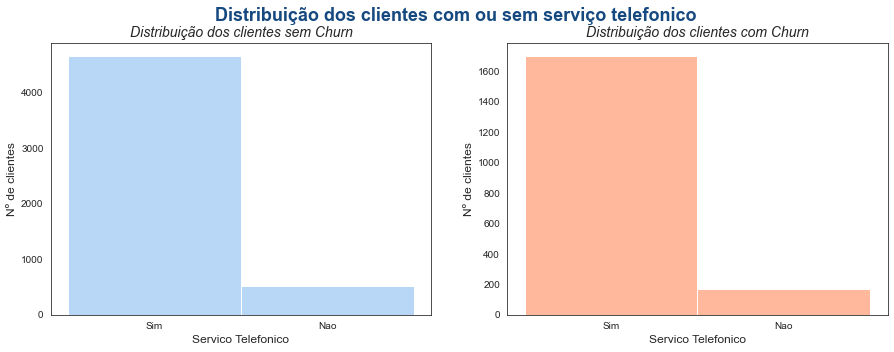

In [73]:
histograma(df, x_col='ServicoTelefonico', xlabel = 'Servico Telefonico', titulo = 'dos clientes com ou sem serviço telefonico')

**90% dos clientes possui o serviço telefônico.** Não é uma variável determinante para o Churn.

## Análise da coluna MultiplasLinhas

In [74]:
df.ServicoMultiplasLinhas.unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [75]:
sim_nao_nophone = {'Yes':'Sim', 'No':'Nao','No phone service':'sem_servico_telefone'}

In [76]:
df.ServicoMultiplasLinhas = df.ServicoMultiplasLinhas.map(sim_nao_nophone)
df.ServicoMultiplasLinhas

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0                        Nao
1                        Sim
2                        Nao
3                        Nao
4                        Nao
                ...         
7262                     Nao
7263                     Sim
7264                     Nao
7265                     Nao
7266    sem_servico_telefone
Name: ServicoMultiplasLinhas, Length: 7043, dtype: object

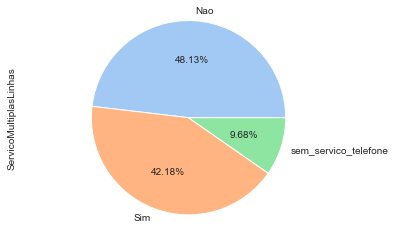

In [77]:
df['ServicoMultiplasLinhas'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

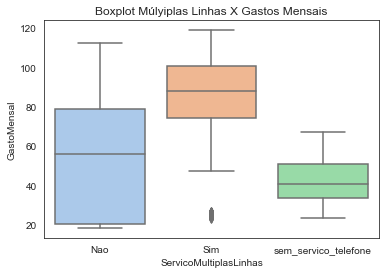

In [78]:
sns.boxplot(x='ServicoMultiplasLinhas', y='GastoMensal', data=df)
plt.title('Boxplot Múlyiplas Linhas X Gastos Mensais')
plt.show()

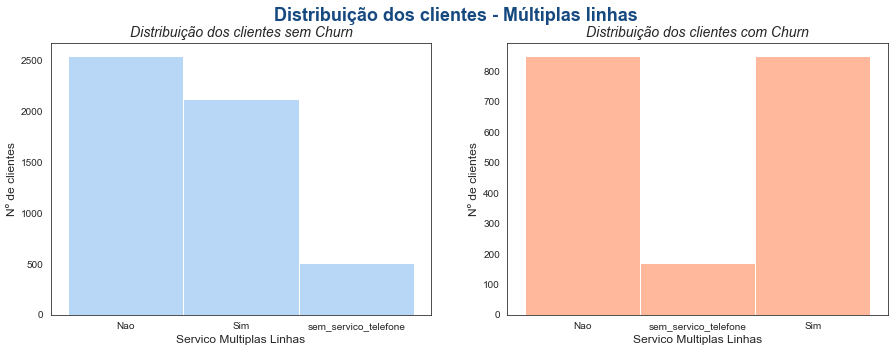

In [79]:
histograma(df, x_col='ServicoMultiplasLinhas', xlabel = 'Servico Multiplas Linhas', titulo = 'dos clientes - Múltiplas linhas')

**42% dos clientes possui o serviço de múltiplas linhas.** Não é uma variável determinante para o Churn.

## Análise da coluna AssinaturaInternet

In [80]:
df.AssinaturaInternet.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [81]:
net = {'DSL':'DSL', 'Fiber optic':'fibra_otica', 'No':'sem_servico_internet'}
df.AssinaturaInternet = df.AssinaturaInternet.map(net)
df.AssinaturaInternet

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0               DSL
1               DSL
2       fibra_otica
3       fibra_otica
4       fibra_otica
           ...     
7262            DSL
7263    fibra_otica
7264            DSL
7265            DSL
7266            DSL
Name: AssinaturaInternet, Length: 7043, dtype: object

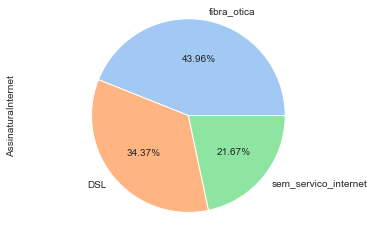

In [82]:
df['AssinaturaInternet'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

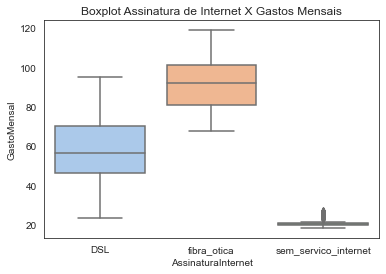

In [83]:
sns.boxplot(x='AssinaturaInternet', y='GastoMensal', data=df)
plt.title('Boxplot Assinatura de Internet X Gastos Mensais')
plt.show()

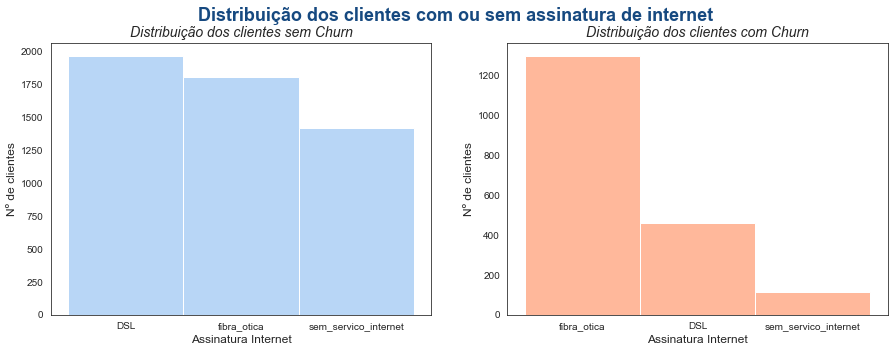

In [84]:
histograma(df, x_col='AssinaturaInternet', xlabel = 'Assinatura Internet', titulo = 'dos clientes com ou sem assinatura de internet')

34% dos clientes utiliza serviço de internet DSL. A depender da disponiblilidade da rede de Fibra Ótica, é interessante incentivar a alteração para este serviço, visto que a **receita da Fibra Ótica é maior**. Além disso, **22% da base de clientes não utiliza o serviço de internet**. Pode-se investir em campanhas de marketing para conversão desses clientes.

Porém verificamos que a maior parte dos **clientes evadidos possuem o serviço de fibra ótica. Precisamos apurar se houve algum problema com a concessão deste tipo de serviço.**

## Análise da coluna SegurançaOnline

In [85]:
df.SegurancaOnline.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [86]:
net2 = {'No':'Nao', 'Yes':'Sim', 'No internet service':'sem_servico_internet'}
df.SegurancaOnline = df.SegurancaOnline.map(net2)
df.SegurancaOnline

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0       Nao
1       Nao
2       Nao
3       Nao
4       Nao
       ... 
7262    Sim
7263    Nao
7264    Nao
7265    Sim
7266    Sim
Name: SegurancaOnline, Length: 7043, dtype: object

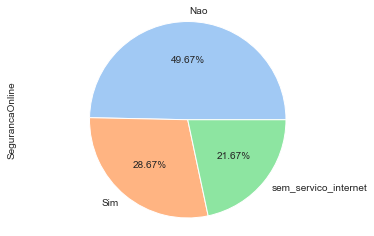

In [87]:
df['SegurancaOnline'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

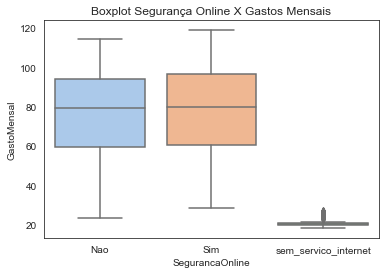

In [88]:
sns.boxplot(x='SegurancaOnline', y='GastoMensal', data=df)
plt.title('Boxplot Segurança Online X Gastos Mensais')
plt.show()

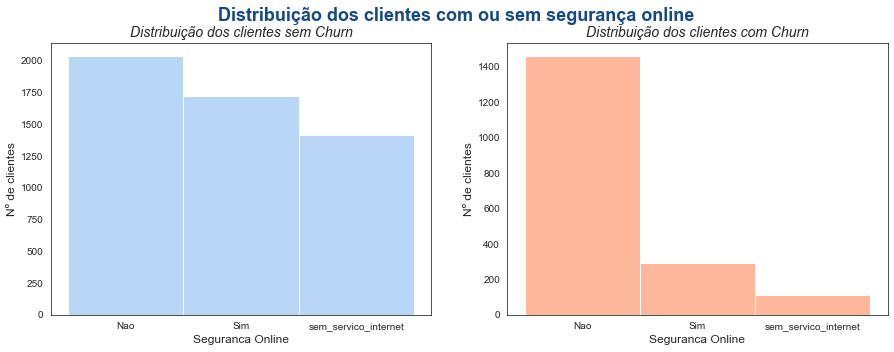

In [89]:
histograma(df, x_col='SegurancaOnline', xlabel = 'Seguranca Online', titulo = 'dos clientes com ou sem segurança online')

**Há uma maior taxa de evasão em clientes sem segurança online.**

## Análise da coluna BackupOnline

In [90]:
df.BackupOnline.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [91]:
df.BackupOnline = df.BackupOnline.map(net2)
df.BackupOnline

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0       Sim
1       Nao
2       Nao
3       Sim
4       Nao
       ... 
7262    Nao
7263    Nao
7264    Sim
7265    Nao
7266    Sim
Name: BackupOnline, Length: 7043, dtype: object

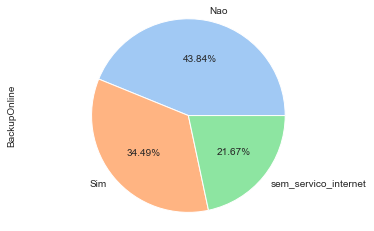

In [92]:
df['BackupOnline'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

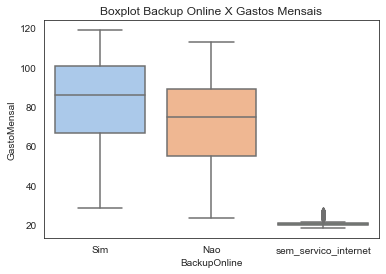

In [93]:
sns.boxplot(x='BackupOnline', y='GastoMensal', data=df)
plt.title('Boxplot Backup Online X Gastos Mensais')
plt.show()

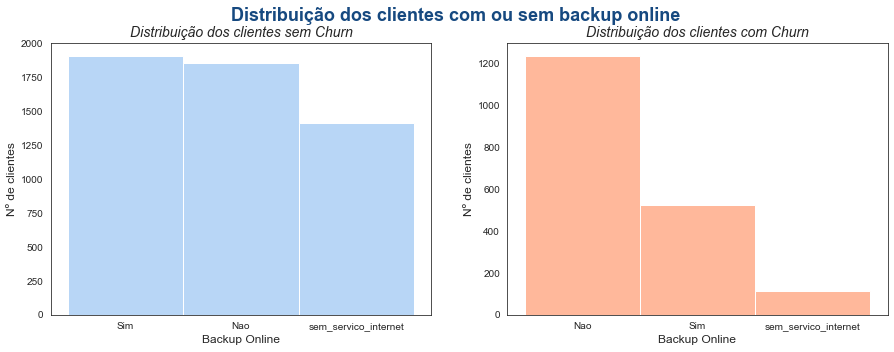

In [94]:
histograma(df, x_col='BackupOnline', xlabel = 'Backup Online', titulo = 'dos clientes com ou sem backup online')

**Há uma maior taxa de evasão em clientes sem backup online.**

## Análise da coluna ProteçãoDispositivo

In [95]:
df.ProtecaoDispositivo.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [96]:
df.ProtecaoDispositivo = df.ProtecaoDispositivo.map(net2)
df.ProtecaoDispositivo

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0       Nao
1       Nao
2       Sim
3       Sim
4       Nao
       ... 
7262    Nao
7263    Nao
7264    Nao
7265    Sim
7266    Sim
Name: ProtecaoDispositivo, Length: 7043, dtype: object

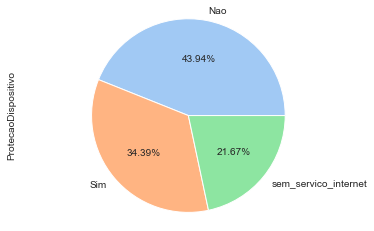

In [97]:
df['ProtecaoDispositivo'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

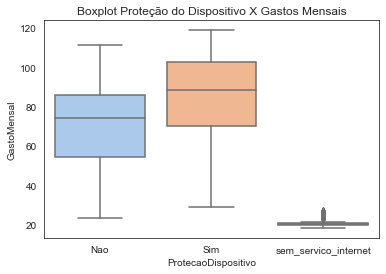

In [98]:
sns.boxplot(x='ProtecaoDispositivo', y='GastoMensal', data=df)
plt.title('Boxplot Proteção do Dispositivo X Gastos Mensais')
plt.show()

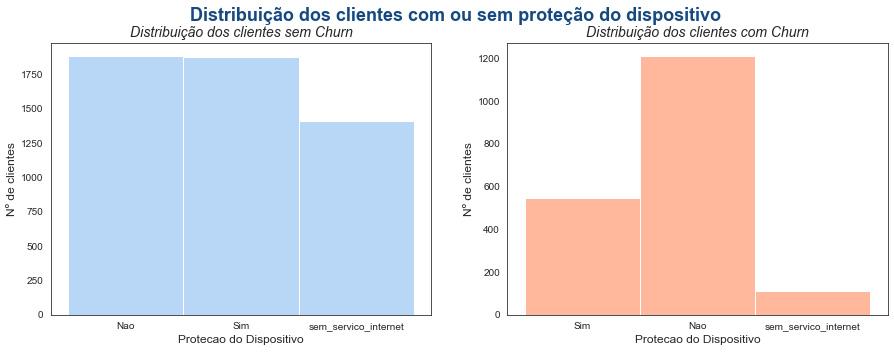

In [99]:
histograma(df, x_col='ProtecaoDispositivo', xlabel = 'Protecao do Dispositivo', titulo = 'dos clientes com ou sem proteção do dispositivo')

**Há uma maior taxa de evasão em clientes sem proteção do dispositivo.**

## Análise da coluna SuporteTecnico

In [100]:
df.SuporteTecnico.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [101]:
df.SuporteTecnico = df.SuporteTecnico.map(net2)
df.SuporteTecnico

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0       Sim
1       Nao
2       Nao
3       Nao
4       Sim
       ... 
7262    Sim
7263    Nao
7264    Nao
7265    Sim
7266    Nao
Name: SuporteTecnico, Length: 7043, dtype: object

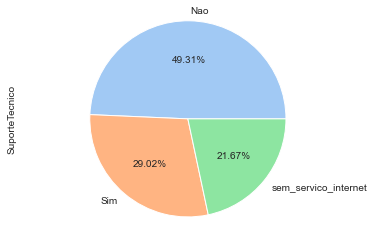

In [102]:
df['SuporteTecnico'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

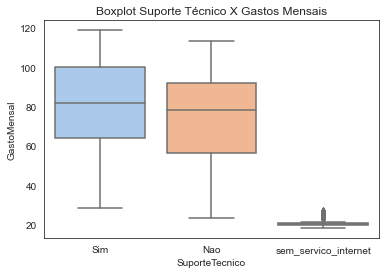

In [103]:
sns.boxplot(x='SuporteTecnico', y='GastoMensal', data=df)
plt.title('Boxplot Suporte Técnico X Gastos Mensais')
plt.show()

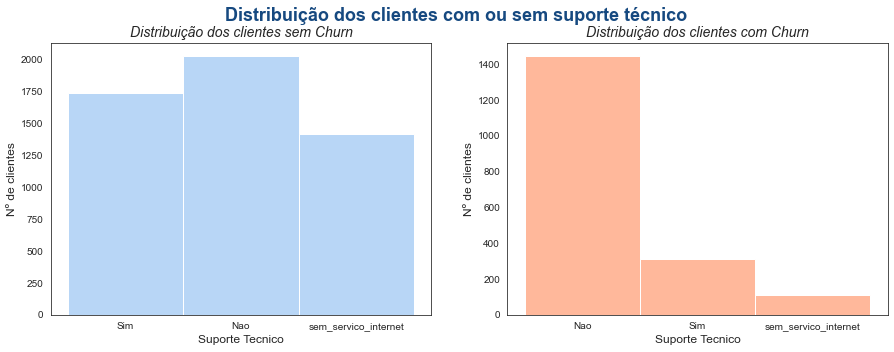

In [104]:
histograma(df, x_col='SuporteTecnico', xlabel = 'Suporte Tecnico', titulo = 'dos clientes com ou sem suporte técnico')

Há uma **maior taxa de evasão em clientes sem suporte técnico.**

**Grande percentual de clientes não utiliza serviços extras de internet.**

## Análise da coluna AssinaturaTvACabo

In [105]:
df.AssinaturaTvACabo.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [106]:
df.AssinaturaTvACabo = df.AssinaturaTvACabo.map(net2)
df.AssinaturaTvACabo

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0       Sim
1       Nao
2       Nao
3       Sim
4       Sim
       ... 
7262    Nao
7263    Nao
7264    Nao
7265    Nao
7266    Sim
Name: AssinaturaTvACabo, Length: 7043, dtype: object

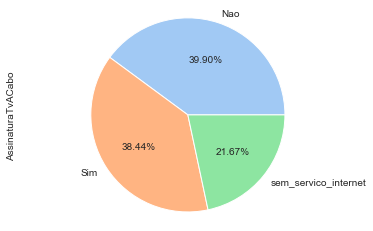

In [107]:
df['AssinaturaTvACabo'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

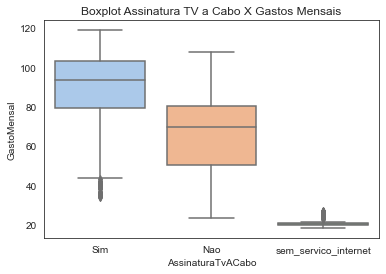

In [108]:
sns.boxplot(x='AssinaturaTvACabo', y='GastoMensal', data=df)
plt.title('Boxplot Assinatura TV a Cabo X Gastos Mensais')
plt.show()

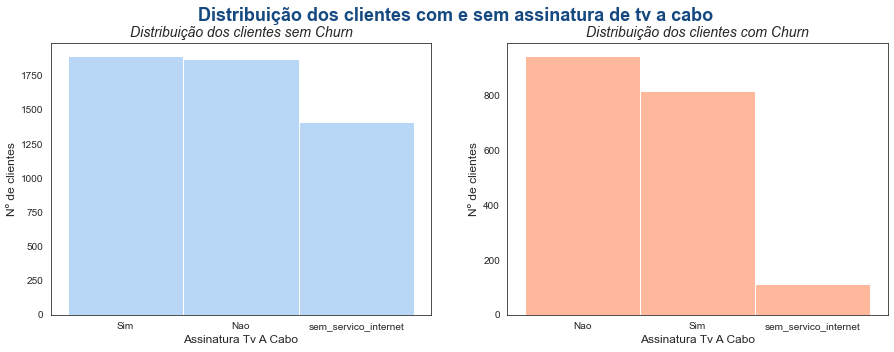

In [109]:
histograma(df, x_col='AssinaturaTvACabo', xlabel = 'Assinatura Tv A Cabo', titulo = 'dos clientes com e sem assinatura de tv a cabo')

**Somente 38% dos clientes possui assinatura de tv a cabo**. É interessante incentivar a assinatura deste serviço, visto que a **receita é maior** e há uma maior **taxa de evasão em clientes sem assinatura de TV a cabo.**

## Análise da coluna AssinaturaFilmes

In [110]:
df.AssinaturaFilmes.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [111]:
df.AssinaturaFilmes = df.AssinaturaFilmes.map(net2)
df.AssinaturaFilmes

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0       Nao
1       Sim
2       Nao
3       Sim
4       Nao
       ... 
7262    Nao
7263    Sim
7264    Nao
7265    Sim
7266    Sim
Name: AssinaturaFilmes, Length: 7043, dtype: object

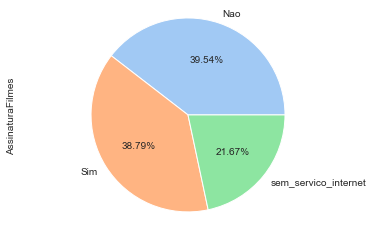

In [112]:
df['AssinaturaFilmes'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

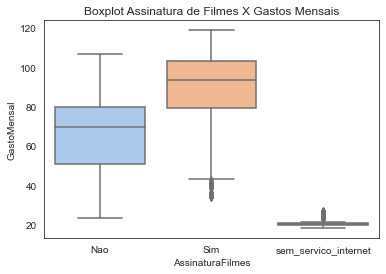

In [113]:
sns.boxplot(x='AssinaturaFilmes', y='GastoMensal', data=df)
plt.title('Boxplot Assinatura de Filmes X Gastos Mensais')
plt.show()

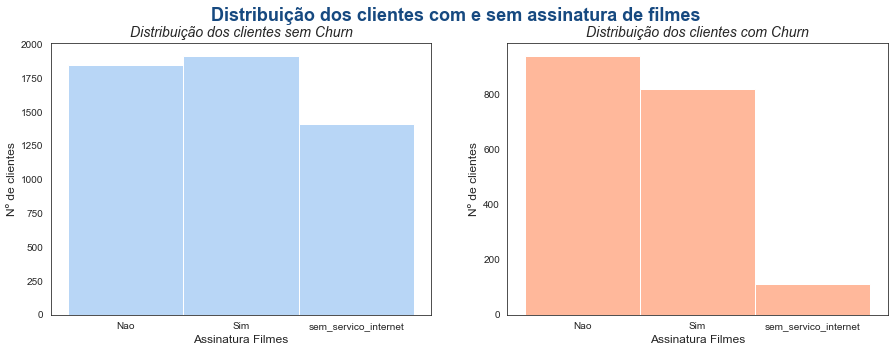

In [114]:
histograma(df, x_col='AssinaturaFilmes', xlabel = 'Assinatura Filmes', titulo = 'dos clientes com e sem assinatura de filmes')

**Somente 38% dos clientes possui assinatura de filmes** (percentual parecido com os que possui assinatura de tv a cabo). Também interessante incentivar a assinatura deste serviço, visto que a **receita é maior** e há **maior taxa de evasão em clientes sem assinatura de filmes**.

## Análise da coluna TipoContrato

In [115]:
df.TipoContrato.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [116]:
periodo = {'One year':'1Ano', 'Month-to-month':'mensal', 'Two year':'2Anos'}
df.TipoContrato = df.TipoContrato.map(periodo)
df.TipoContrato

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0         1Ano
1       mensal
2       mensal
3       mensal
4       mensal
         ...  
7262      1Ano
7263    mensal
7264    mensal
7265     2Anos
7266     2Anos
Name: TipoContrato, Length: 7043, dtype: object

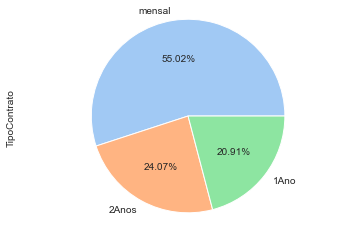

In [117]:
df['TipoContrato'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

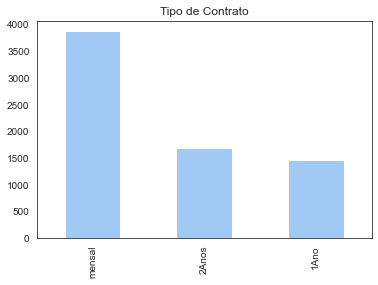

In [118]:
df['TipoContrato'].value_counts().plot(kind='bar')
plt.title("Tipo de Contrato")
plt.show()

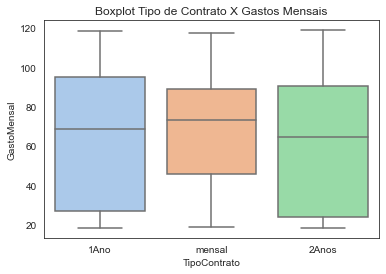

In [119]:
sns.boxplot(x='TipoContrato', y='GastoMensal', data=df)
plt.title('Boxplot Tipo de Contrato X Gastos Mensais')
plt.show()

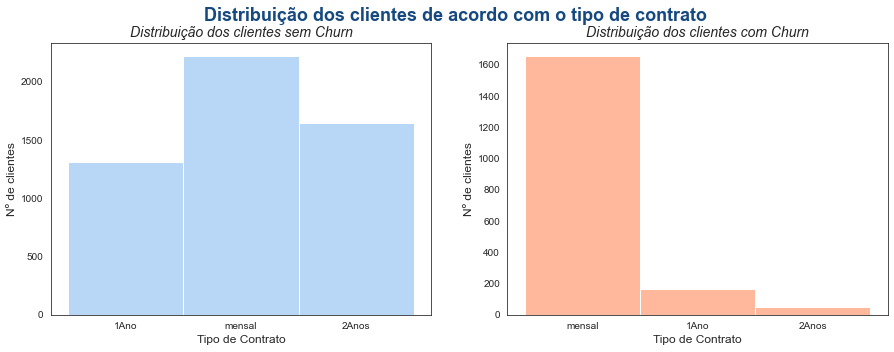

In [120]:
histograma(df, x_col='TipoContrato', xlabel = 'Tipo de Contrato', titulo = 'dos clientes de acordo com o tipo de contrato')

**Maior quantidade de clientes possuem contrato mensal e estes tem uma maior taxa de evasão**. Importante desenhar estratégia de marketing para **converter estes clientes para contratos de maior período.**

## Análise da coluna FaturaOnline

In [121]:
df.FaturaOnline.unique()

array(['Yes', 'No'], dtype=object)

In [122]:
df.FaturaOnline = df.FaturaOnline.map(sim_nao)
df.FaturaOnline

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0       Sim
1       Nao
2       Sim
3       Sim
4       Sim
       ... 
7262    Nao
7263    Sim
7264    Sim
7265    Nao
7266    Nao
Name: FaturaOnline, Length: 7043, dtype: object

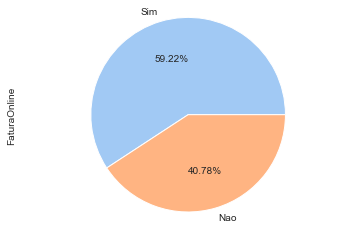

In [123]:
df['FaturaOnline'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

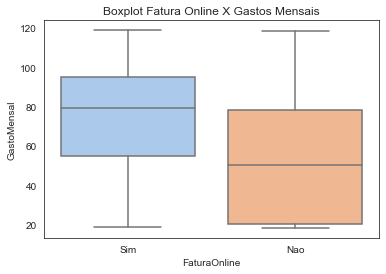

In [124]:
sns.boxplot(x='FaturaOnline', y='GastoMensal', data=df)
plt.title('Boxplot Fatura Online X Gastos Mensais')
plt.show()

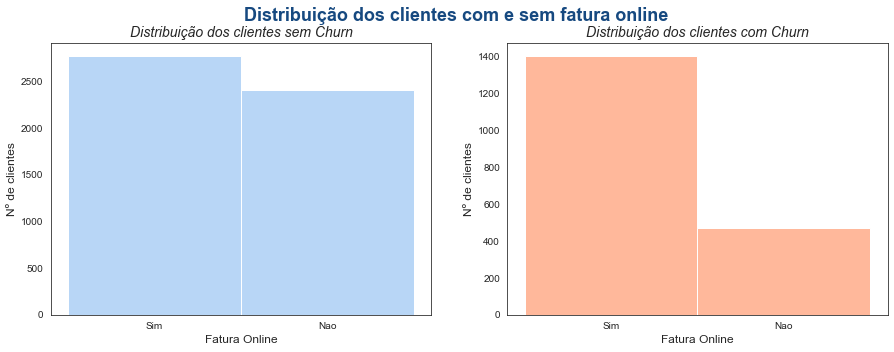

In [125]:
histograma(df, x_col='FaturaOnline', xlabel = 'Fatura Online', titulo = 'dos clientes com e sem fatura online')

**60% dos clientes recebem fatura online**. Estes clientes possuem uma **grande taxa de evasão.** Importante verificar o porquê disto. Será que está ocorrendo **falhas no envio da fatura?**

## Análise da coluna MetodoPagamento

In [126]:
df.MetodoPagamento.unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [127]:
pag = {'Mailed check':'cheque_enviado', 'Electronic check':'cheque_eletronico', 
       'Credit card (automatic)':'cartao_de_credito',
       'Bank transfer (automatic)':'transferencia_bancaria'}

In [128]:
df.MetodoPagamento = df.MetodoPagamento.map(pag)
df.MetodoPagamento

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0          cheque_enviado
1          cheque_enviado
2       cheque_eletronico
3       cheque_eletronico
4          cheque_enviado
              ...        
7262       cheque_enviado
7263    cheque_eletronico
7264       cheque_enviado
7265       cheque_enviado
7266    cheque_eletronico
Name: MetodoPagamento, Length: 7043, dtype: object

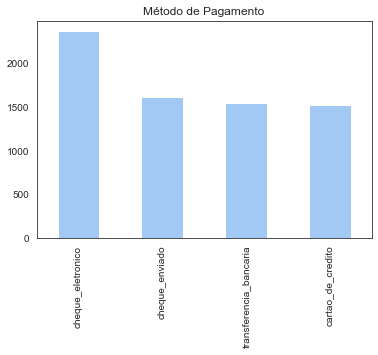

In [129]:
df['MetodoPagamento'].value_counts().plot(kind='bar')
plt.title("Método de Pagamento")
plt.show()

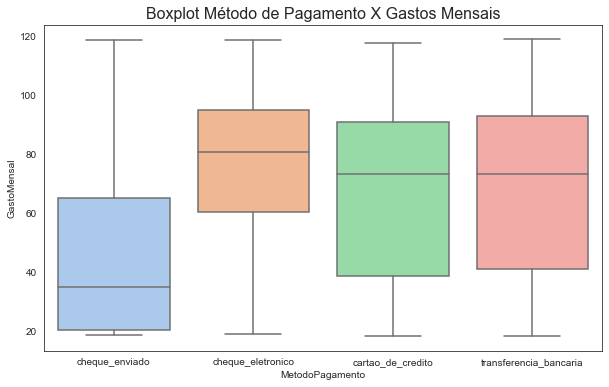

In [130]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='MetodoPagamento', y='GastoMensal', data=df)
plt.title('Boxplot Método de Pagamento X Gastos Mensais', fontsize=16)
plt.show()

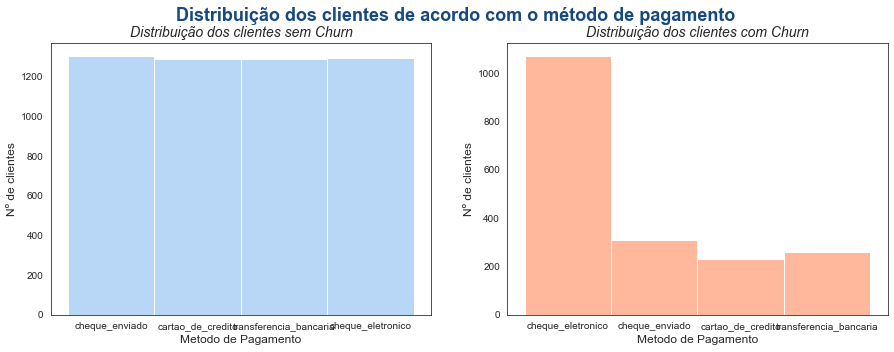

In [131]:
histograma(df, x_col='MetodoPagamento', xlabel = 'Metodo de Pagamento', titulo = 'dos clientes de acordo com o método de pagamento')

**Maior taxa de evasão em clientes com método de pagamento boleto eletrônico**. Poderíamos fazer promoções para mudarmos o metodo de pagamento para **cartão de crédito**, visto que com este tipo de pagamento, há uma menor taxa de evasão, e evita problemas quanto ao envio do boleto.

## Análise da coluna GastoMensal

In [132]:
df.GastoMensal.unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [133]:
df.GastoMensal.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: GastoMensal, dtype: float64

In [134]:
df.GastoMensal.dtypes

dtype('float64')

In [135]:
df.GastoMensal.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: GastoMensal, dtype: float64

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


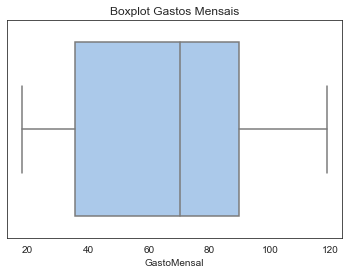

In [136]:
sns.boxplot('GastoMensal', data=df)
plt.title('Boxplot Gastos Mensais')
plt.show()

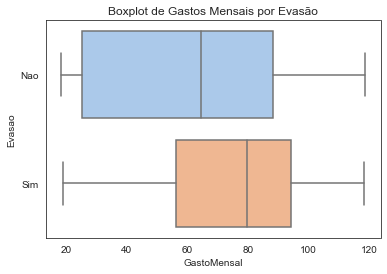

In [137]:
sns.boxplot(x='GastoMensal', y='Evasao', data=df)
plt.title("Boxplot de Gastos Mensais por Evasão")
plt.show()

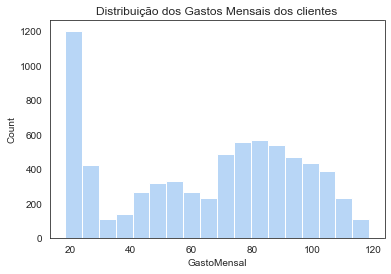

In [138]:
sns.histplot(df['GastoMensal'], kde=False)
plt.title("Distribuição dos Gastos Mensais dos clientes")
plt.show()

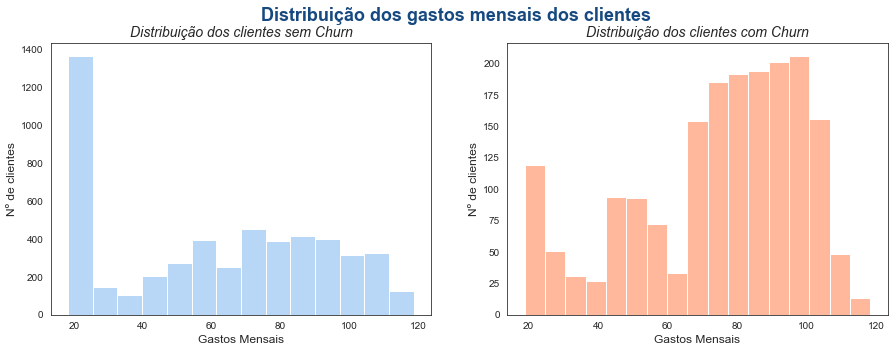

In [139]:
histograma(df, x_col='GastoMensal', xlabel = 'Gastos Mensais', titulo = 'dos gastos mensais dos clientes')

**Maior quantidade de clientes com gastos mensais próximo de 20 reais**. Mediana está em 70.35. Mínimo valor 18.25 e maximo valor 118.75. Verificamos que os **clientes com maior taxa de evasão são os com maiores gastos mensais. Poderíamos indicar alguns planos promocionais para estes clientes.**

## Análise da coluna GastoTotal

In [140]:
df.GastoTotal.unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [141]:
df.GastoTotal.dtypes

dtype('O')

In [142]:
df.GastoTotal.describe()

count     7043
unique    6531
top           
freq        11
Name: GastoTotal, dtype: object

Tínhamos verificado que os dados da coluna **GastoTotal** estavam classificados como **objeto**. Iremos transformar para **float**.

In [143]:
df['GastoTotal'] = pd.to_numeric(df['GastoTotal'],errors = 'coerce')

/var/folders/wq/v6b_q61j6zqc33gpbvj9jb000000gn/T/ipykernel_62682/3729214009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GastoTotal'] = pd.to_numeric(df['GastoTotal'],errors = 'coerce')


In [144]:
df.loc[df['GastoTotal'].isnull()]

,clienteId,Evasao,Genero,Senioridade,Conjuge,Dependentes,MesesContrato,ServicoTelefonico,ServicoMultiplasLinhas,AssinaturaInternet,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,AssinaturaTvACabo,AssinaturaFilmes,TipoContrato,FaturaOnline,MetodoPagamento,GastoMensal,GastoTotal,faixa_meses
975,1371-DWPAZ,Nao,feminino,Nao,Sim,Sim,0,Nao,sem_servico_telefone,DSL,Sim,Sim,Sim,Sim,Sim,Nao,2Anos,Nao,cartao_de_credito,56.05,NaN,1.0
1775,2520-SGTTA,Nao,feminino,Nao,Sim,Sim,0,Sim,Nao,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,2Anos,Nao,cheque_enviado,20.00,NaN,1.0
1955,2775-SEFEE,Nao,masculino,Nao,Nao,Sim,0,Sim,Sim,DSL,Sim,Sim,Nao,Sim,Nao,Nao,2Anos,Sim,transferencia_bancaria,61.90,NaN,1.0
2075,2923-ARZLG,Nao,masculino,Nao,Sim,Sim,0,Sim,Nao,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,1Ano,Sim,cheque_enviado,19.70,NaN,1.0
2232,3115-CZMZD,Nao,masculino,Nao,Nao,Sim,0,Sim,Nao,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,2Anos,Nao,cheque_enviado,20.25,NaN,1.0
2308,3213-VVOLG,Nao,masculino,Nao,Sim,Sim,0,Sim,Sim,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,2Anos,Nao,cheque_enviado,25.35,NaN,1.0
2930,4075-WKNIU,Nao,feminino,Nao,Sim,Sim,0,Sim,Sim,DSL,Nao,Sim,Sim,Sim,Sim,Nao,2Anos,Nao,cheque_enviado,73.35,NaN,1.0
3134,4367-NUYAO,Nao,masculino,Nao,Sim,Sim,0,Sim,Sim,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,sem_servico_internet,2Anos,Nao,cheque_enviado,25.75,NaN,1.0
3203,4472-LVYGI,Nao,feminino,Nao,Sim,Sim,0,Nao,sem_servico_telefone,DSL,Sim,Nao,Sim,Sim,Sim,Nao,2Anos,Sim,transferencia_bancaria,52.55,NaN,1.0
4169,5709-LVOEQ,Nao,feminino,Nao,Sim,Sim,0,Sim,Nao,DSL,Sim,Sim,Sim,Nao,Sim,Sim,2Anos,Nao,cheque_enviado,80.85,NaN,1.0


Há **11 dados faltantes na coluna GastoTotal**. Percebemos que os valores nulos se referem a clientes no primeiro mês de assinatura dos serviços. Iremos substituir os valores nulos pelos valores da coluna GastoMensal

In [145]:
df.GastoTotal.fillna(df.GastoMensal, inplace=True)

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [146]:
df.GastoTotal.describe()

count    7043.000000
mean     2279.798992
std      2266.730170
min        18.800000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: GastoTotal, dtype: float64

Podemos ver uma grande **discrepância dos valores dos gastos totais**, tendo valor mínimo 18.80 e valor máximo 8.684. A mediana se encontra em 1.397 e a média 2.281.

In [147]:
df.GastoTotal.isna().sum()

0

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


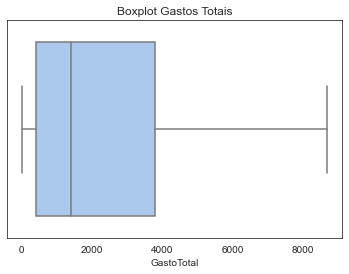

In [148]:
sns.boxplot('GastoTotal', data=df)
plt.title('Boxplot Gastos Totais')
plt.show()

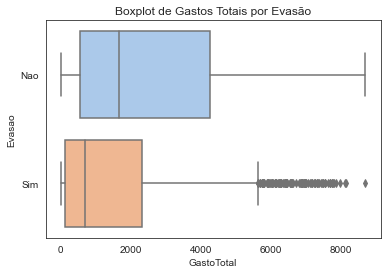

In [149]:
sns.boxplot(x='GastoTotal', y='Evasao', data=df)
plt.title("Boxplot de Gastos Totais por Evasão")
plt.show()

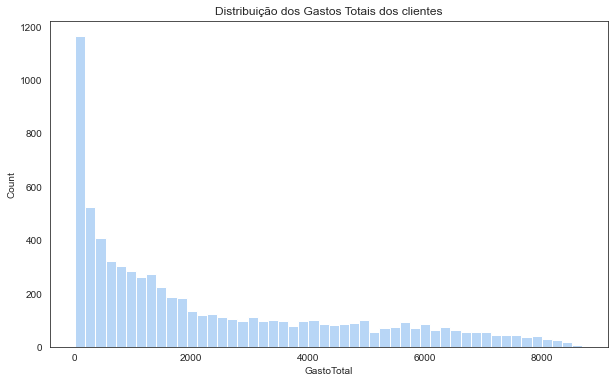

In [150]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['GastoTotal'], kde=False, bins=50)
plt.title("Distribuição dos Gastos Totais dos clientes")
plt.show()

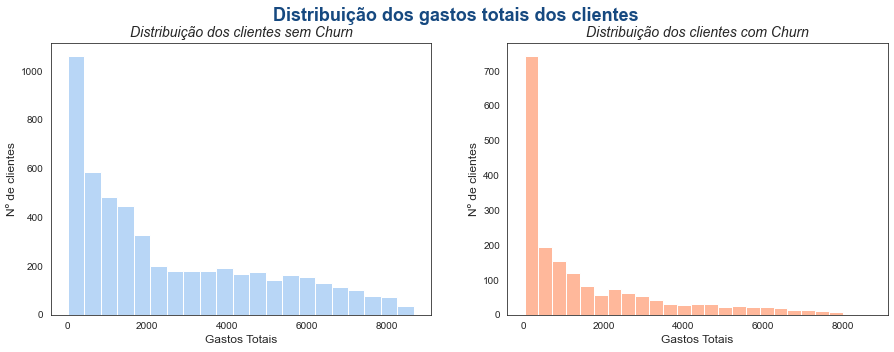

In [151]:
histograma(df, x_col='GastoTotal', xlabel = 'Gastos Totais', titulo = 'dos gastos totais dos clientes')

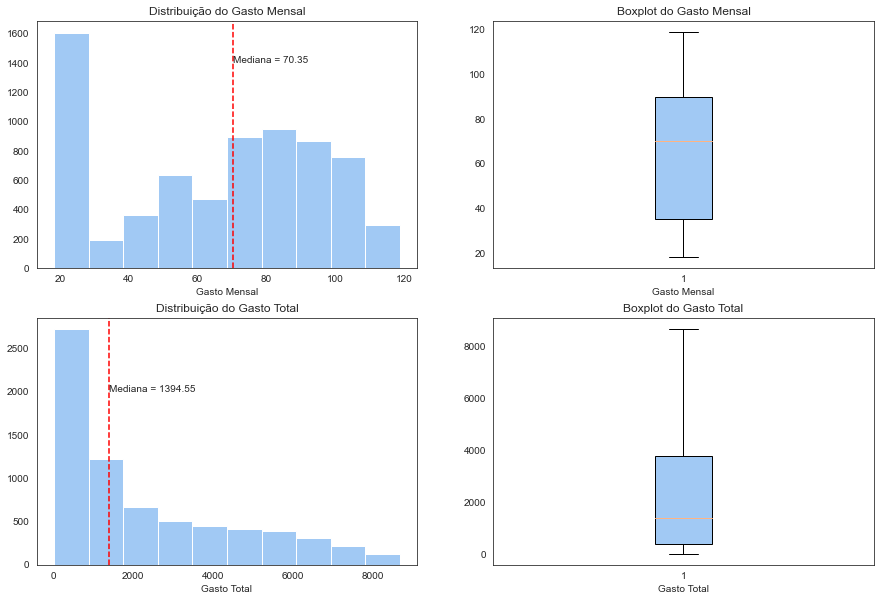

In [152]:
fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(2,2)

ax = fig.add_subplot(gs[0, 0])
ax.hist(df["GastoMensal"])
ax.set_title('Distribuição do Gasto Mensal')
ax.set_xlabel('Gasto Mensal')
ax.axvline(df["GastoMensal"].median(), color='r', linestyle='--')
ax.annotate(f'Mediana = {df["GastoMensal"].median()}', xy=(df["GastoMensal"].median(),1400), fontsize=10)

ax = fig.add_subplot(gs[0, 1])
ax.boxplot(df["GastoMensal"], patch_artist=True)
ax. set_title('Boxplot do Gasto Mensal')
ax.set_xlabel('Gasto Mensal')

ax = fig.add_subplot(gs[1, 0])
ax.hist(df['GastoTotal'])
ax. set_title('Distribuição do Gasto Total')
ax.set_xlabel('Gasto Total')
ax.axvline(df['GastoTotal'].median(), color='r', linestyle='--')
ax.annotate(f'Mediana = {df["GastoTotal"].median()}', xy=(df["GastoTotal"].median(),2000), fontsize=10)

ax = fig.add_subplot(gs[1, 1])
ax.boxplot(df['GastoTotal'], patch_artist=True)
ax. set_title('Boxplot do Gasto Total')
ax.set_xlabel('Gasto Total')



plt.show();

Verificamos que uma **parcela menor de usuários é responsável por um faturamento maior**. 
Maior quantidade de clientes com gastos totais abaixo de 100 reais. Mediana está em 1394. Mínimo valor 18.80 e maximo valor 8684.80.

Conseguimos verificar também que os gastos mensais dos clientes fidelizados são menores que os do que evadiram, mas os gastos totais são maiores pois o tempo de permanência é maior. **Campanhas promocionais visando um menor valor mensal, porém com fidelização do tempo de permanência seria uma excelente estratégia para diminuição de churn.**

## Inclusão e Análise da coluna GastoDiario

In [153]:
GastoDiario = round((df['GastoMensal'] / 30), 2)

In [154]:
df.insert(loc = 21, column = 'GastoDiario', value = GastoDiario)

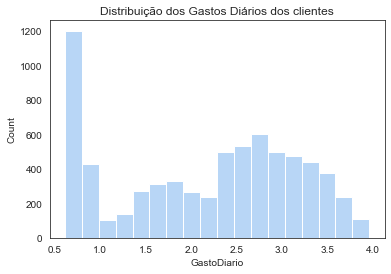

In [155]:
sns.histplot(df['GastoDiario'], kde=False)
plt.title("Distribuição dos Gastos Diários dos clientes")
plt.show()

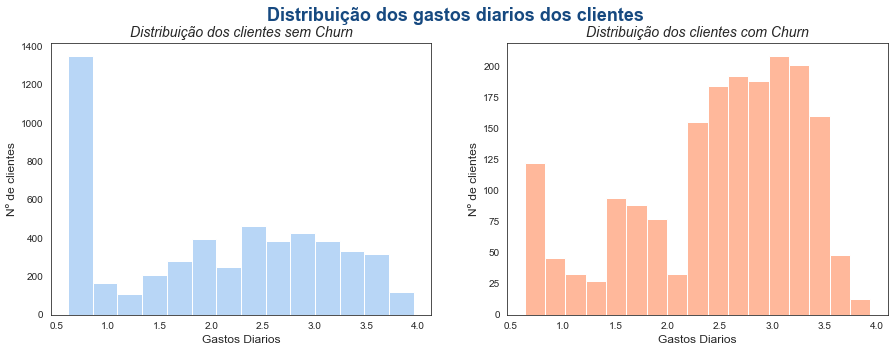

In [156]:
histograma(df, x_col='GastoDiario', xlabel = 'Gastos Diarios', titulo = 'dos gastos diarios dos clientes')

## Análise da variável Evasão com as demais

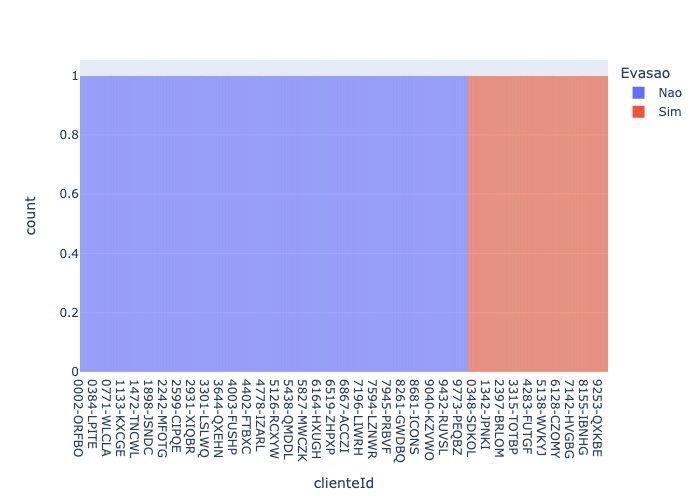

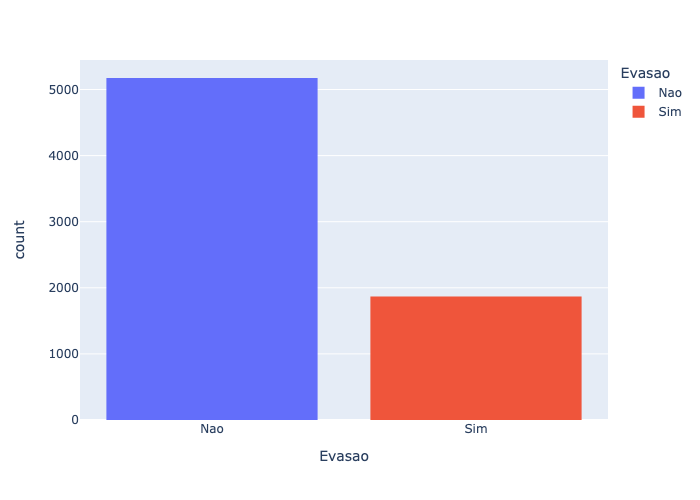

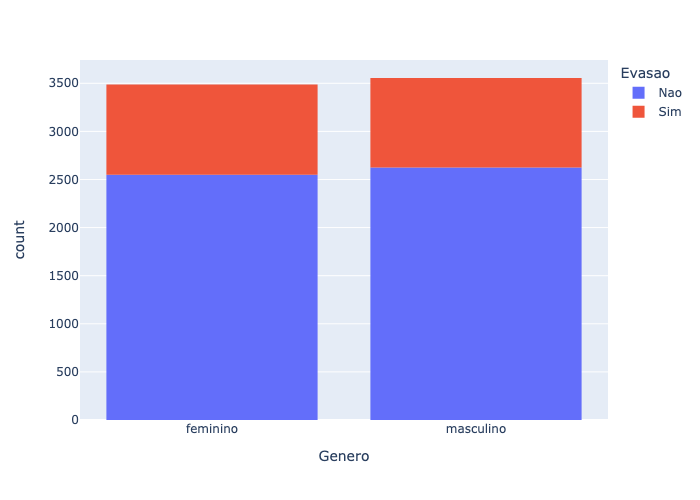

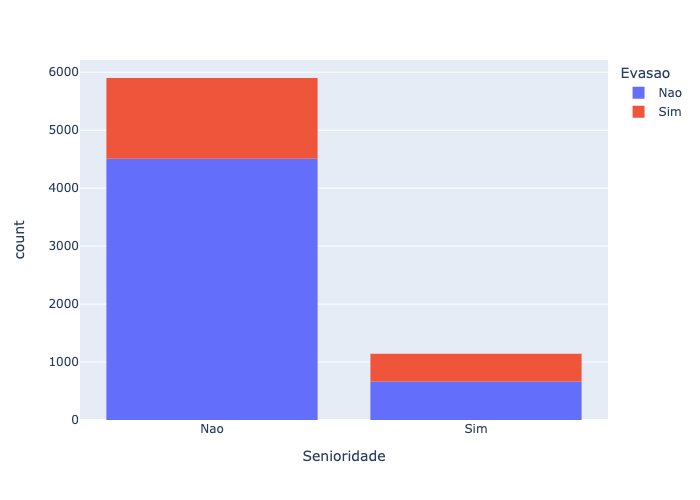

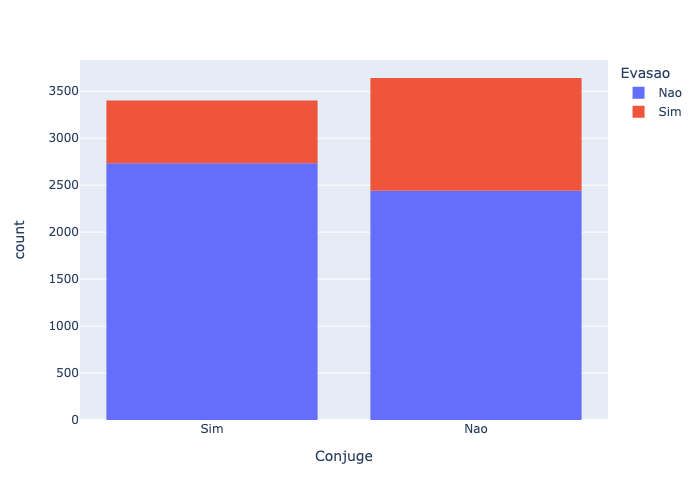

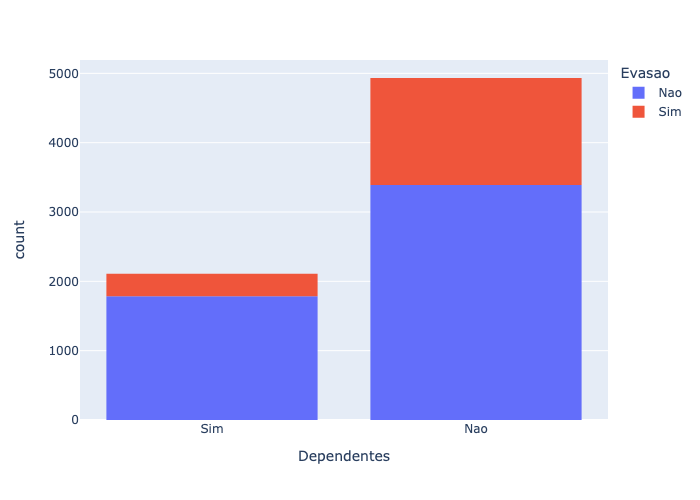

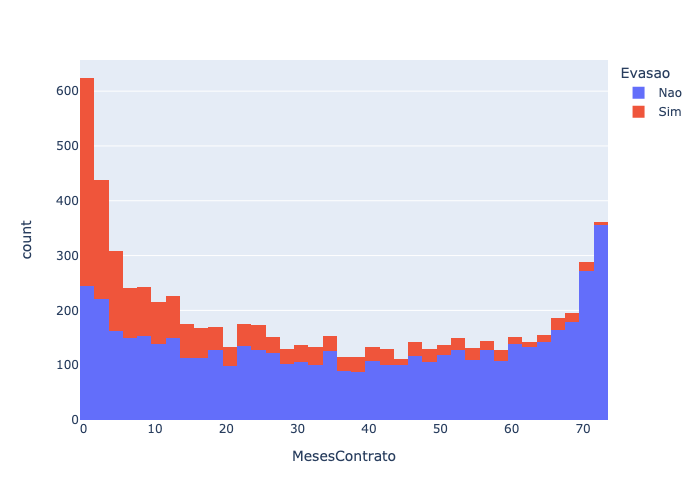

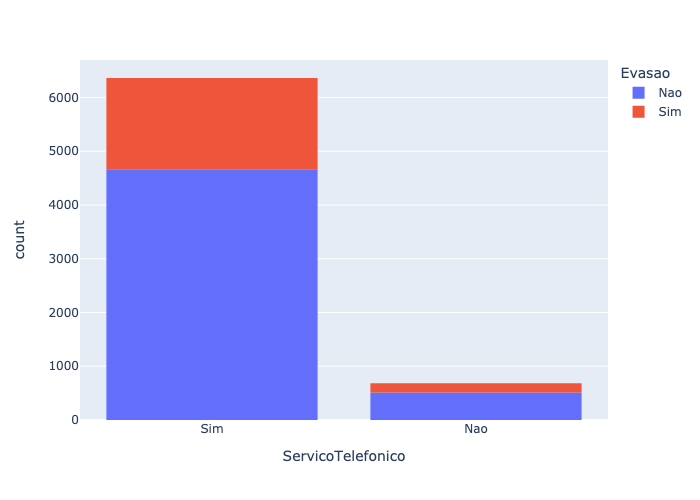

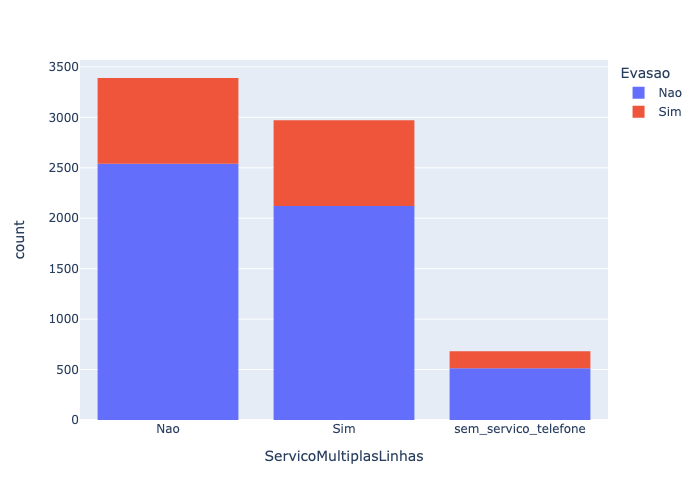

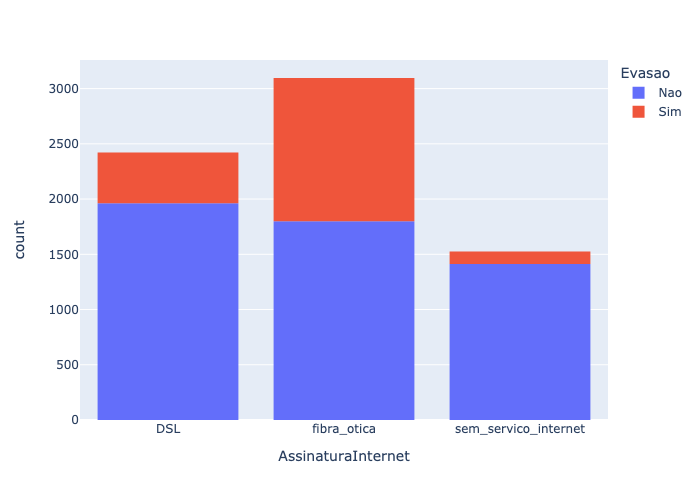

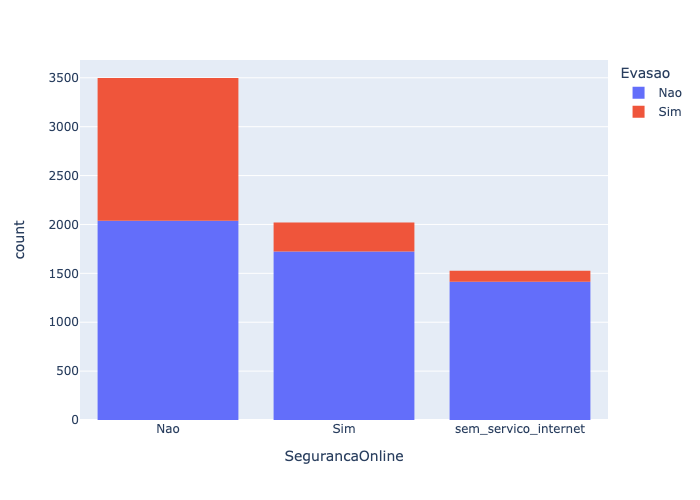

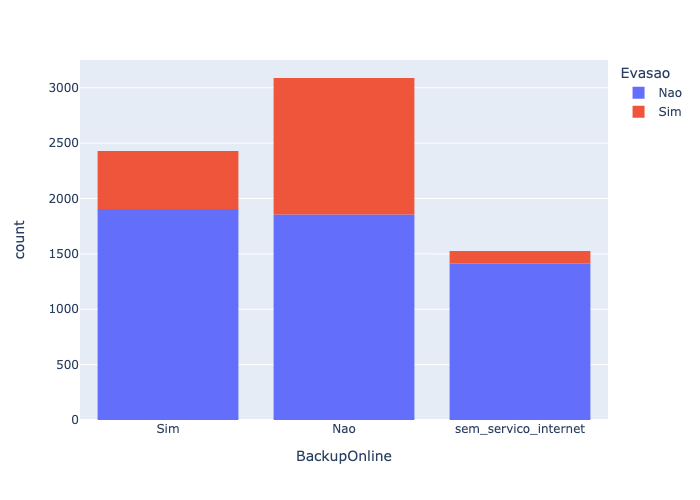

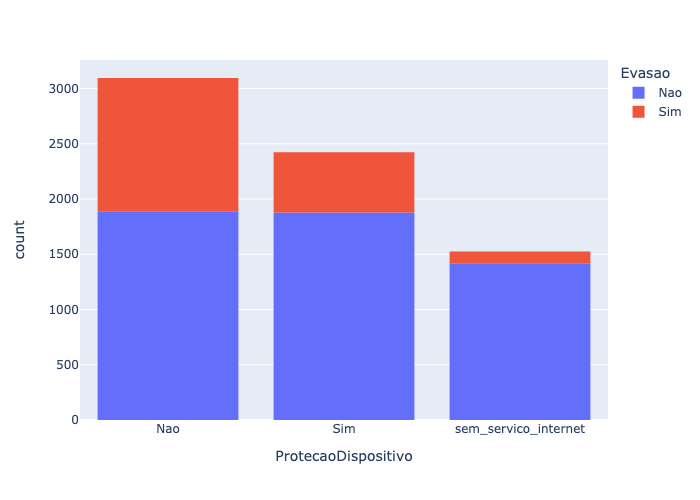

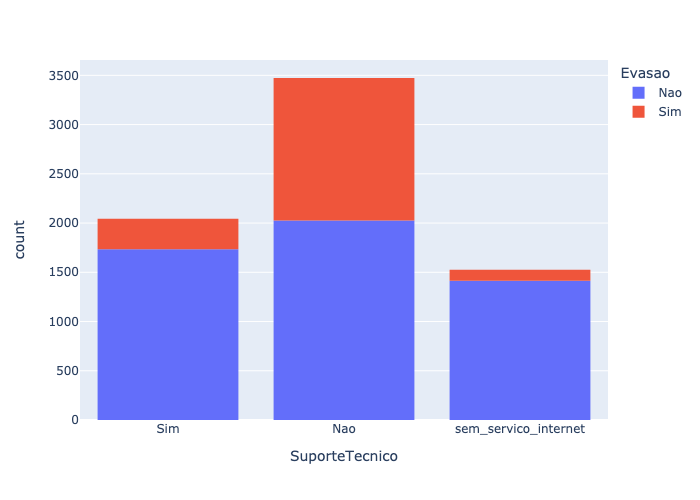

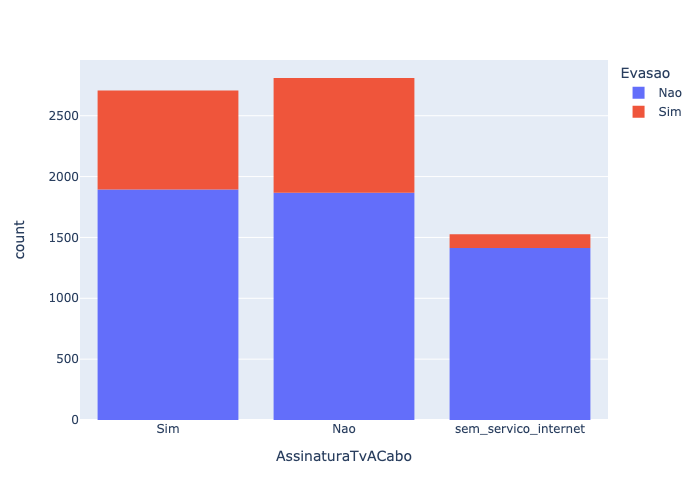

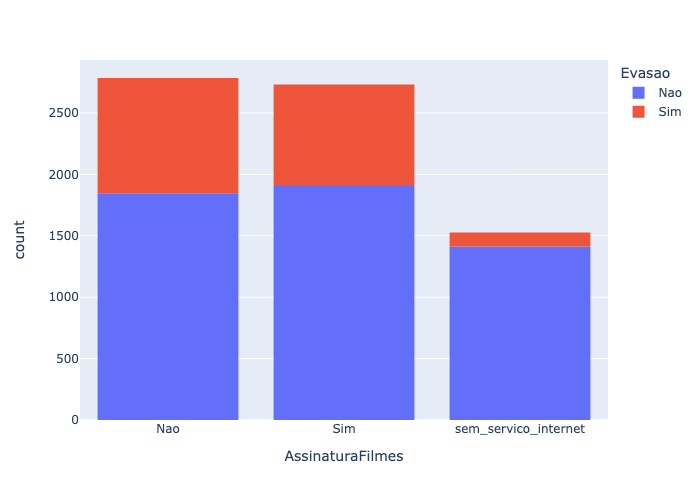

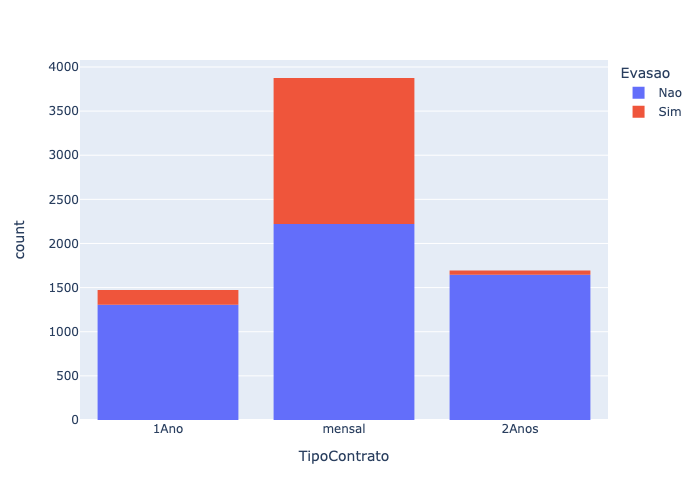

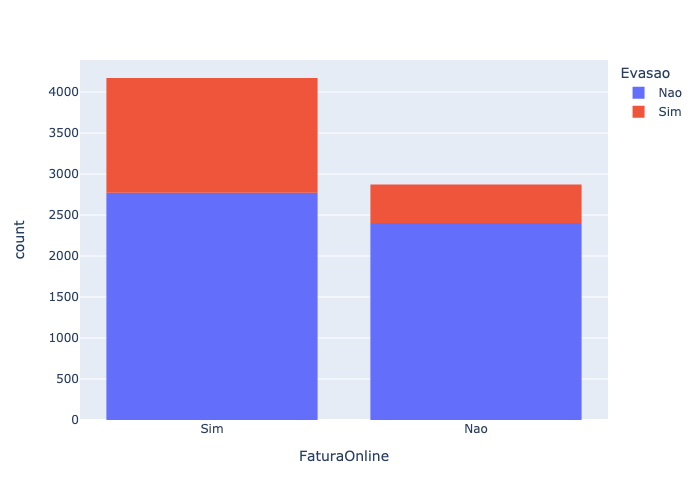

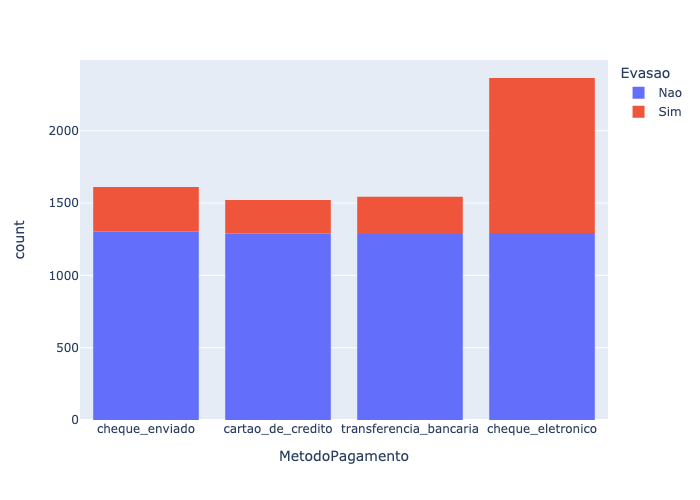

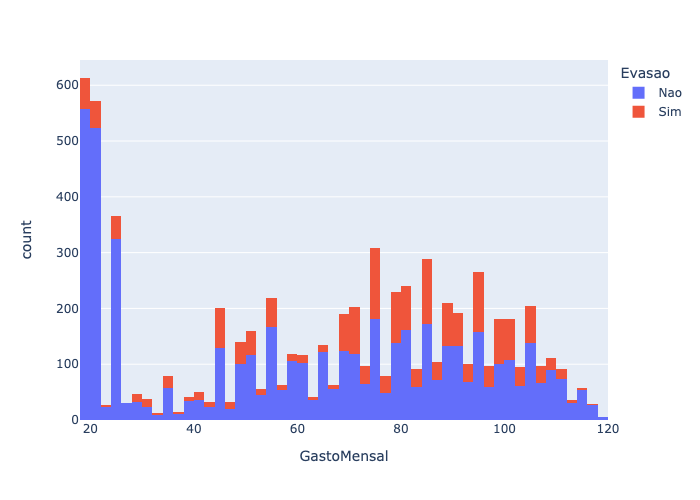

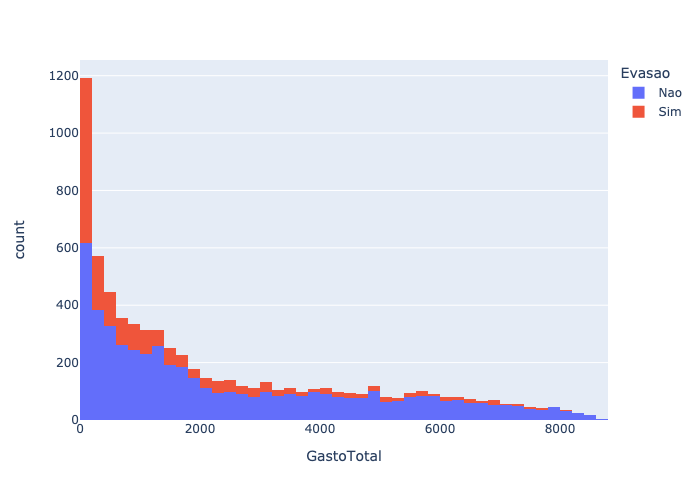

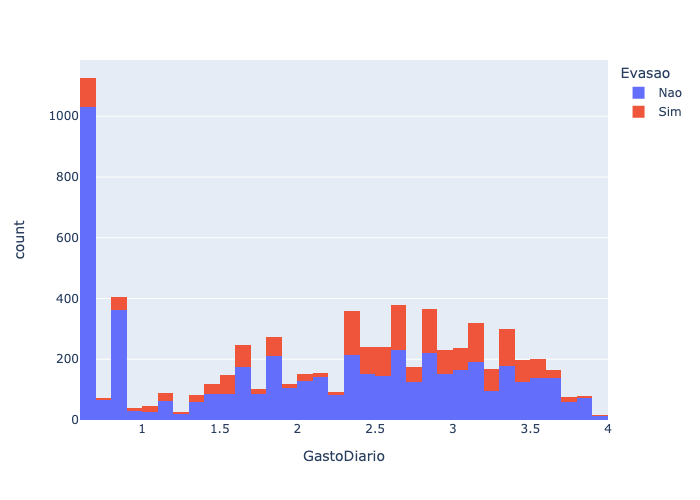

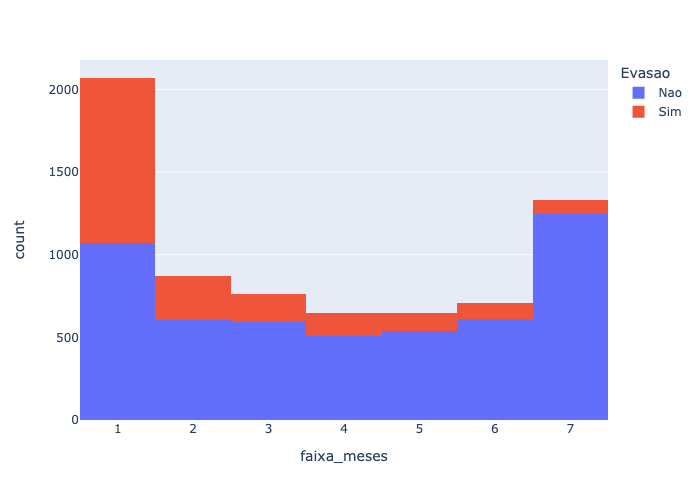

In [157]:
for coluna in df.columns:
    fig = px.histogram(df, x=coluna, color="Evasao")
    fig.show('png')

## Conclusões a partir da análise exploratória

Após comparar a variável **Evasão** com todas as outras, conseguimos concluir que:

**A maior taxa de evasão estão presentes nas seguintes categorias:**

    - Menores de 65 anos;
    - Sem cônjuge e dependentes;
    - Contrato menor que 10 meses;
    - Com serviço de fibra ótica;
    - Sem servicos complementares (segurança online, backup online, proteção de dispositivo, suporte técnico);
    - Com contrato mensal;
    - Com método de pagamento via cheque eletrônico;
    - Com gasto total até 200 reais.
    
**Sugestão de projetos de ação:**

    - Podemos fazer promoções para:
        - O cliente ir para o contrato anual;
        - Adquirir serviços complementares;
        - Adquirir uma linha adicional para familiar;
    - Pensar em alguma ação para os clientes migrarem do método de pagamento boleto para outra, como cartão de crédito;
    - Verificar qual o problema dos clientes que possuem fibra ótica.
        
            

# Transformação de variáveis categóricas para numéricas

In [158]:
dic1 = {'Nao':0, 'Sim':1, 'sem_servico_telefone':0, 'sem_servico_internet':0}
dic2 = {'feminino':0, 'masculino':1}
dic3 = {'sem_servico_internet':0, 'DSL':1, 'fibra_otica':2}
dic4 = {'mensal':0, '1Ano':1, '2Anos':2}
dic5 = {'cheque_enviado':0, 'cheque_eletronico':1, 'cartao_de_credito':2, 'transferencia_bancaria':3}

In [159]:
df.Evasao = df.Evasao.map(dic1)
df.Genero = df.Genero.map(dic2)
df.Senioridade = df.Senioridade.map(dic1)
df.Conjuge = df.Conjuge.map(dic1)
df.Dependentes = df.Dependentes.map(dic1)
df.ServicoTelefonico = df.ServicoTelefonico.map(dic1)
df.ServicoMultiplasLinhas = df.ServicoMultiplasLinhas.map(dic1)
df.AssinaturaInternet = df.AssinaturaInternet.map(dic3)
df.SegurancaOnline = df.SegurancaOnline.map(dic1)
df.BackupOnline = df.BackupOnline.map(dic1)
df.ProtecaoDispositivo = df.ProtecaoDispositivo.map(dic1)
df.SuporteTecnico = df.SuporteTecnico.map(dic1)
df.AssinaturaTvACabo = df.AssinaturaTvACabo.map(dic1)
df.AssinaturaFilmes = df.AssinaturaFilmes.map(dic1)
df.TipoContrato = df.TipoContrato.map(dic4)
df.FaturaOnline = df.FaturaOnline.map(dic1)
df.MetodoPagamento = df.MetodoPagamento.map(dic5)

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [160]:
df

,clienteId,Evasao,Genero,Senioridade,Conjuge,Dependentes,MesesContrato,ServicoTelefonico,ServicoMultiplasLinhas,AssinaturaInternet,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,AssinaturaTvACabo,AssinaturaFilmes,TipoContrato,FaturaOnline,MetodoPagamento,GastoMensal,GastoTotal,GastoDiario,faixa_meses
0,0002-ORFBO,0,0,0,1,1,9,1,0,1,0,1,0,1,1,0,1,1,0,65.60,593.30,2.19,1.0
1,0003-MKNFE,0,1,0,0,0,9,1,1,1,0,0,0,0,0,1,0,0,0,59.90,542.40,2.00,1.0
2,0004-TLHLJ,1,1,0,0,0,4,1,0,2,0,0,1,0,0,0,0,1,1,73.90,280.85,2.46,1.0
3,0011-IGKFF,1,1,1,1,0,13,1,0,2,0,1,1,0,1,1,0,1,1,98.00,1237.85,3.27,2.0
4,0013-EXCHZ,1,0,1,1,0,3,1,0,2,0,0,0,1,1,0,0,1,0,83.90,267.40,2.80,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,0,0,0,0,13,1,0,1,1,0,0,1,0,0,1,0,0,55.15,742.90,1.84,2.0
7263,9992-RRAMN,1,1,0,1,0,22,1,1,2,0,0,0,0,0,1,0,1,1,85.10,1873.70,2.84,3.0
7264,9992-UJOEL,0,1,0,0,0,2,1,0,1,0,1,0,0,0,0,0,1,0,50.30,92.75,1.68,1.0
7265,9993-LHIEB,0,1,0,1,1,67,1,0,1,1,0,1,1,0,1,2,0,0,67.85,4627.65,2.26,7.0


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   clienteId               7043 non-null   object 
 1   Evasao                  7043 non-null   int64  
 2   Genero                  7043 non-null   int64  
 3   Senioridade             7043 non-null   int64  
 4   Conjuge                 7043 non-null   int64  
 5   Dependentes             7043 non-null   int64  
 6   MesesContrato           7043 non-null   int64  
 7   ServicoTelefonico       7043 non-null   int64  
 8   ServicoMultiplasLinhas  7043 non-null   int64  
 9   AssinaturaInternet      7043 non-null   int64  
 10  SegurancaOnline         7043 non-null   int64  
 11  BackupOnline            7043 non-null   int64  
 12  ProtecaoDispositivo     7043 non-null   int64  
 13  SuporteTecnico          7043 non-null   int64  
 14  AssinaturaTvACabo       7043 non-null   

# Matriz de Correlação

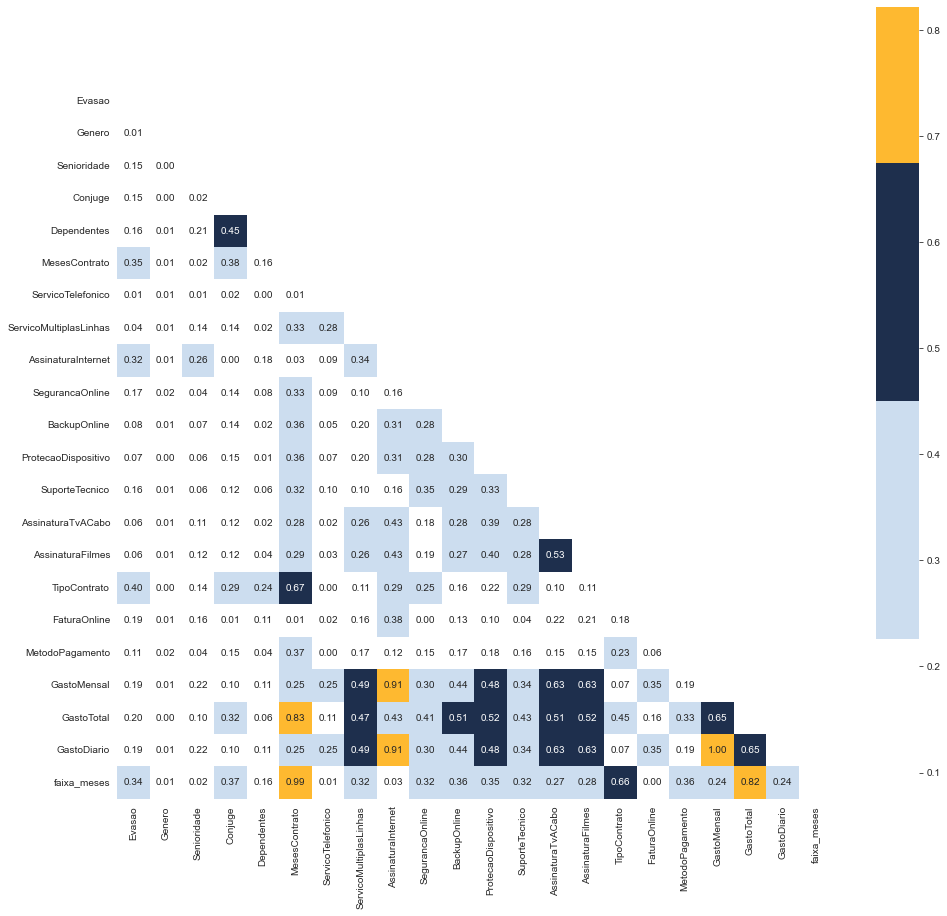

In [162]:
matrix_corr = df.corr().abs()
mask = np.zeros_like(matrix_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 16))
    ax = sns.heatmap(matrix_corr, mask=mask, square=True, cmap=['#ffffff','#ccddef','#1e2f4d','#feb930'], center=0.45, robust=True, annot= True, fmt=".2f")

## Removendo colunas

In [164]:
df.drop(['clienteId', 'GastoTotal', 'GastoDiario', 'faixa_meses'], axis=1, inplace=True)

/Users/luana/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Nossa base de dados possui muitas variáveis **altamente correlacionadas Gasto Total, Gasto Diario, faixa_meses**, principamente aquelas que foram criadas com base em dados já existentes, as quais podem gerar problemas de overfit nos modelos de predição. Então foram removidas do dataset, além da variável **clienteId** que não influencia em nada as demais.

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Evasao                  7043 non-null   int64  
 1   Genero                  7043 non-null   int64  
 2   Senioridade             7043 non-null   int64  
 3   Conjuge                 7043 non-null   int64  
 4   Dependentes             7043 non-null   int64  
 5   MesesContrato           7043 non-null   int64  
 6   ServicoTelefonico       7043 non-null   int64  
 7   ServicoMultiplasLinhas  7043 non-null   int64  
 8   AssinaturaInternet      7043 non-null   int64  
 9   SegurancaOnline         7043 non-null   int64  
 10  BackupOnline            7043 non-null   int64  
 11  ProtecaoDispositivo     7043 non-null   int64  
 12  SuporteTecnico          7043 non-null   int64  
 13  AssinaturaTvACabo       7043 non-null   int64  
 14  AssinaturaFilmes        7043 non-null   

# Balanceamento dos dados

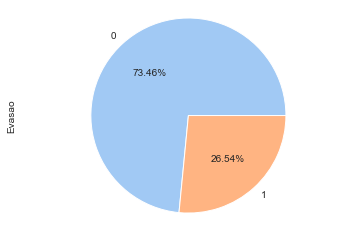

In [166]:
df['Evasao'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

Como já tínhamos verificado na análise exploratória, nossa variável target **Evasão** está **desbalanceada**. Precisamos fazer o rebalanceamento dos dados para equilibrar as classes, diminuindo a probabilidade do modelo tornar-se tendencioso para uma determinada classe.

Para este projeto, será utilizado o método **oversampling** pois não remove informações do sistema. Para aplicar o oversampling, será utilizado o método **SMOTE()**. Para balancear o dataset, são criadas linhas sintéticas com base nos dados já existentes.

In [167]:
x = df.drop('Evasao', axis=1)
y = df['Evasao']

In [168]:
smote = SMOTE(random_state=SEED)

In [169]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [170]:
dados_balanceados = pd.concat([y_resampled, x_resampled], axis=1)
dados_balanceados

,Evasao,Genero,Senioridade,Conjuge,Dependentes,MesesContrato,ServicoTelefonico,ServicoMultiplasLinhas,AssinaturaInternet,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,AssinaturaTvACabo,AssinaturaFilmes,TipoContrato,FaturaOnline,MetodoPagamento,GastoMensal
0,0,0,0,1,1,9,1,0,1,0,1,0,1,1,0,1,1,0,65.600000
1,0,1,0,0,0,9,1,1,1,0,0,0,0,0,1,0,0,0,59.900000
2,1,1,0,0,0,4,1,0,2,0,0,1,0,0,0,0,1,1,73.900000
3,1,1,1,1,0,13,1,0,2,0,1,1,0,1,1,0,1,1,98.000000
4,1,0,1,1,0,3,1,0,2,0,0,0,1,1,0,0,1,0,83.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1,0,0,0,0,2,1,0,2,0,0,0,0,0,1,0,1,1,85.786786
10344,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,49.755638
10345,1,1,0,0,0,1,1,0,2,0,0,0,0,0,0,0,1,1,69.264820
10346,1,0,0,0,0,4,1,0,2,0,0,0,0,0,0,0,0,1,70.241848


In [171]:
print(f'Nosso Conjunto de Dados balanceados tem {dados_balanceados.shape[0]} linhas e {dados_balanceados.shape[1]} colunas.')

Nosso Conjunto de Dados balanceados tem 10348 linhas e 19 colunas.


In [172]:
dados_balanceados.groupby('Evasao').Evasao.count()

Evasao
0    5174
1    5174
Name: Evasao, dtype: int64

# Machine Learning 

## Definindo as features (dados de entrada) e os labels (dados de saída)

In [173]:
x = dados_balanceados.drop('Evasao', axis=1)
y = dados_balanceados['Evasao']

## Criação de bases de treino e teste

In [174]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=SEED)

## Regressão Logística

In [175]:
#criando o modelo
modelo_rl = LogisticRegression(max_iter=1000)

#treinando o modelo
modelo_rl.fit(x_treino, y_treino)

#criando previsões
y_pred = modelo_rl.predict(x_teste)

## Avaliação do Modelo

Com os modelos treinados e as previsões feitas, os modelos podem ser comparados utilizando de métricas de machine learning. Serão usadas as seguintes métricas:

   **Acurácia**, que mostra a taxa de acerto do modelo;
   
   **Precisão**, que é a proporção de predições corretas de uma categoria em relação a todas as predições dessa categoria (taxa de acerto ao se considerar apenas os clientes que o modelo previu que ia cancelar o contrato);
   
   **Recall**, que é a proporção de predições corretas da categoria alvo (taxa de acerto do modelo, ao se considerar apenas os clientes que cancelaram o contrato);
   
   **F1**, que é a média harmonica entre a precisão e o recall;
   
   **Matriz de confusão**, que mostra a contagem dos acertos e dos erros do modelo de machine learning.
   
   **Curva Roc**, que avalia o desempenho do modelo a partir da relação entre a taxa de verdadeiros positivos e a taxa de falsos positivos para diferentes limites. Nós queremos que a nossa curva ROC esteja mais próxima do canto superior esquerdo porque ele vai maximizar a minha taxa de verdadeiros positivos e vai minimizar a minha taxa de falsos positivos.

In [176]:
print("ACURÁCIA REGRESSÃO LOGÍSTICA: ", accuracy_score(y_teste, y_pred))
print (classification_report(y_teste, y_pred))

ACURÁCIA REGRESSÃO LOGÍSTICA:  0.8149758454106281
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1045
           1       0.81      0.82      0.81      1025

    accuracy                           0.81      2070
   macro avg       0.81      0.82      0.81      2070
weighted avg       0.82      0.81      0.81      2070



### Matriz de Confusão

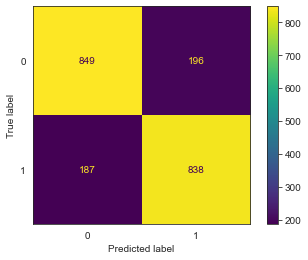

In [177]:
cm = confusion_matrix(y_teste, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## SVC

In [178]:
#criando o modelo
svc = SVC(random_state=SEED)

#treinando o modelo
svc.fit(x_treino, y_treino)

#criando previsões
y_pred = svc.predict(x_teste)

### Avaliação do Modelo

In [179]:
print("ACURÁCIA SVC: ", accuracy_score(y_teste, y_pred))
print (classification_report(y_teste, y_pred))

ACURÁCIA SVC:  0.7454106280193237
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1045
           1       0.73      0.77      0.75      1025

    accuracy                           0.75      2070
   macro avg       0.75      0.75      0.75      2070
weighted avg       0.75      0.75      0.75      2070



### Matriz de Confusao

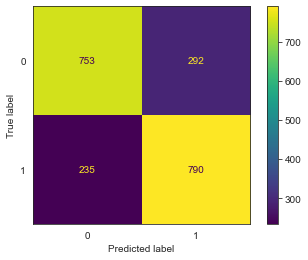

In [180]:
cm = confusion_matrix(y_teste, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Árvore de Decisão

In [181]:
#criando o modelo
modelo_tree = DecisionTreeClassifier(max_depth=5, random_state = SEED)

#treinando o modelo
modelo_tree.fit(x_treino, y_treino)

#criando previsões
y_pred = modelo_tree.predict(x_teste)

### Avaliação do Modelo

In [182]:
print("ACURÁCIA ÁRVORE DE DECISÃO: ", accuracy_score(y_teste, y_pred))
print (classification_report(y_teste, y_pred))

ACURÁCIA ÁRVORE DE DECISÃO:  0.7932367149758454
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1045
           1       0.78      0.81      0.80      1025

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



### Matriz de Confusao

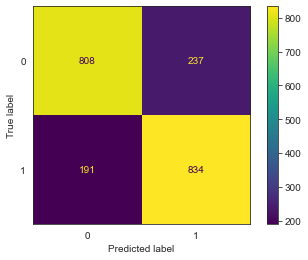

In [183]:
cm = confusion_matrix(y_teste, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Random Forest

In [184]:
#criando o modelo
rforest = RandomForestClassifier(max_depth = 5, random_state=SEED)

#treinando o modelo
rforest.fit(x_treino, y_treino)

#criando previsões
y_pred = rforest.predict(x_teste)

### Avaliação do Modelo

In [185]:
print("ACURÁCIA RANDOM FOREST: ", accuracy_score(y_teste, y_pred))
print (classification_report(y_teste, y_pred))

ACURÁCIA RANDOM FOREST:  0.7995169082125604
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1045
           1       0.78      0.84      0.80      1025

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



### Matriz de Confusão

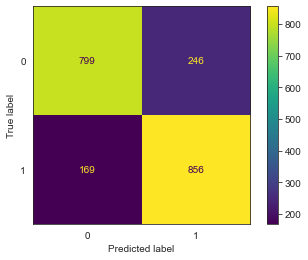

In [186]:
cm = confusion_matrix(y_teste, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Comparando os modelos

In [187]:
classifiers = [ 
    SVC(random_state=77),
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth = 5, random_state=SEED),
    RandomForestClassifier(max_depth= 5, random_state = SEED)]

SVC
****Resultados****
Acurácia: 0.7454106280193237
Precisão: 0.7301293900184843
Recall: 0.7707317073170732
F1: 0.7498813478879924
LogisticRegression
****Resultados****
Acurácia: 0.8149758454106281
Precisão: 0.8104448742746615
Recall: 0.817560975609756
F1: 0.8139873725109277
DecisionTreeClassifier
****Resultados****
Acurácia: 0.7932367149758454
Precisão: 0.7787114845938375
Recall: 0.8136585365853658
F1: 0.7958015267175572
RandomForestClassifier
****Resultados****
Acurácia: 0.7995169082125604
Precisão: 0.7767695099818511
Recall: 0.8351219512195122
F1: 0.8048895157498823


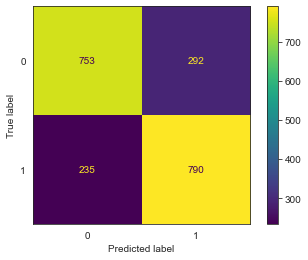

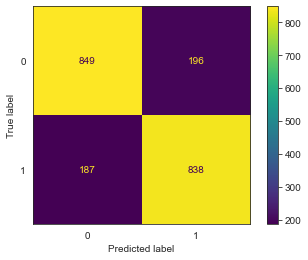

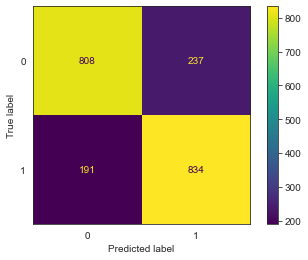

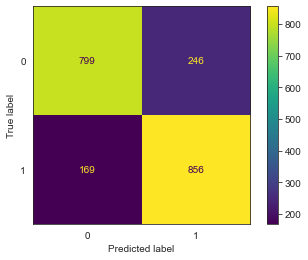

In [188]:
for clf in classifiers:
  clf.fit(x_treino, y_treino)
  name = clf.__class__.__name__
  print("="*30)
  print(name)
  print('****Resultados****')
  y_pred = clf.predict(x_teste)
  print("Acurácia:", metrics.accuracy_score(y_teste, y_pred))
  print("Precisão:", metrics.precision_score(y_teste, y_pred))
  print("Recall:", metrics.recall_score(y_teste, y_pred))
  print("F1:", metrics.f1_score(y_teste, y_pred))
  
  cm = confusion_matrix(y_teste, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()

A **curva ROC** avalia o desempenho do modelo a partir da relação entre a taxa de verdadeiros positivos (sensibilidade) e a taxa de falsos positivos (especificidade) para diferentes limites.

Nós queremos que a nossa curva ROC esteja mais próxima do canto superior esquerdo porque ele vai maximizar a minha taxa de verdadeiros positivos e vai minimizar a minha taxa de falsos positivos. 

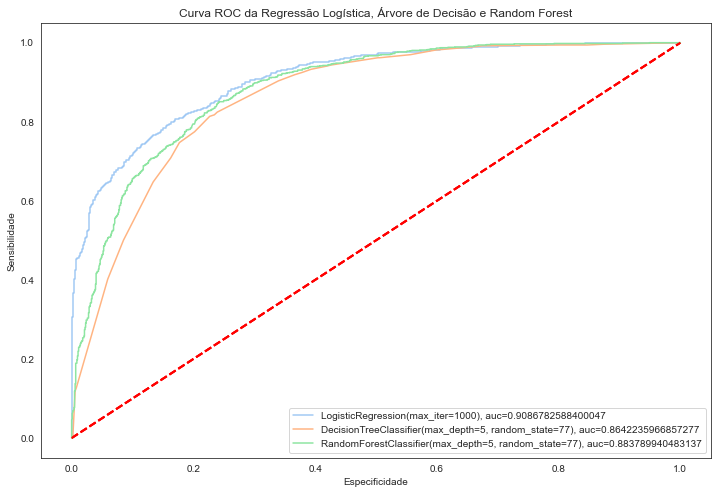

In [189]:
for modelo in [modelo_rl, modelo_tree, rforest]:
                
    y_pred_proba = modelo.predict_proba(x_teste)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_teste, y_pred_proba)
    auc = metrics.roc_auc_score(y_teste, y_pred_proba)

    plt.rcParams['figure.figsize'] = (12.,8.)
    plt.plot(fpr,tpr,label = f'{modelo}, auc={auc}')
    plt.plot([0,1],[0,1],color = 'red', lw = 2, linestyle = '--')
    plt.legend(loc = 4)
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')
    plt.title('Curva ROC da Regressão Logística, Árvore de Decisão e Random Forest')

O **AUC** quantifica a **curva ROC**. Ou seja, através da área sob a curva, ele me diz o quão bom está o nosso gráfico. 
Se a área da curva ROC é menor do que 0.7, temos uma baixa discriminação na base de dados. 
Se a área está contida entre 0.7 e 0.8, temos uma discriminação aceitável, porém baixa. 
Se a área está entre 0.8 e 0.9, temos uma ótima, uma discriminação no modelo. 
E se a área é maior do que 0.9, temos uma discriminação excepcional.

# Conclusões

Após o treino e teste dos modelos SVC, Regressão Logística, Árvore de Decisão e Random Forest, fizemos as comparações entre os resultado obtidos. O modelo **Regressão Logística** apresentou o melhor resultado nas métricas analisadas.


Conseguimos também detectar alguns padrões de clientes que **tendem a cancelar o contrato** com a empresa:


   - Menores de 65 anos;
   - Sem cônjuge e dependentes;
   - Contrato menor que 10 meses;
   - Com serviço de fibra ótica;
   - Sem servicos complementares (segurança online, backup online, proteção de dispositivo, suporte técnico);
   - Com contrato mensal;
   - Com método de pagamento via boleto eletrônico;
    
**Sugestão de projetos de ação:**

   - Podemos realizar **promoções** para:
        - O cliente trasnferir o prazo de seu contrato para o **anual**;
        - Adquirir **serviços complementares**;
        - Adquirir uma **linha adicional** para familiar;
   - Pensar em alguma ação para os clientes migrarem do método de pagamento boleto para outra, como **cartão de crédito**;
   - Verificar qual o problema dos clientes que possuem fibra ótica e agir em cima deste problema.